In [1]:
import spacy
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import random

warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("https://groups.csail.mit.edu/sls/downloads/restaurant/restauranttrain.bio", names=["Label-words"])
test = pd.read_csv("https://groups.csail.mit.edu/sls/downloads/restaurant/restauranttest.bio", names=["Label-words"])

In [3]:
train.head()

,Label-words
0,B-Rating\t2
1,I-Rating\tstart
2,O\trestaurants
3,O\twith
4,B-Amenity\tinside


In [4]:
train.shape

(70525, 1)

In [5]:
def modify(df):
    """Split the dataframe into labels/tags, and the word(s)"""
    df[["Label", "Words"]] = df["Label-words"].apply(lambda x: pd.Series(str(x).split("\t")))
    df.drop("Label-words", axis=1, inplace=True)
    return df

In [6]:
rtrain = modify(train)
rtest = modify(test)
rtrain.head()

,Label,Words
0,B-Rating,2
1,I-Rating,start
2,O,restaurants
3,O,with
4,B-Amenity,inside


In [7]:
rtrain.head(39)

,Label,Words
0,B-Rating,2
1,I-Rating,start
2,O,restaurants
3,O,with
4,B-Amenity,inside
5,I-Amenity,dining
6,O,34
7,B-Rating,5
8,I-Rating,star
9,O,resturants


In [8]:
entity = pd.DataFrame(rtrain['Label'].value_counts())
entity["Count"] = entity["Label"]
entity["Entity"] = entity.index
entity.index = [x for x in range(len(entity))]
entity.drop("Label", axis=1, inplace=True)

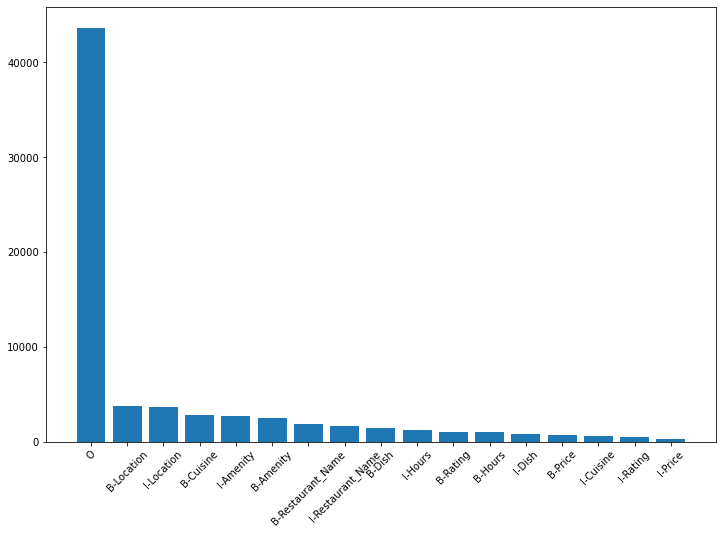

In [9]:
plt.figure(figsize=(12,8))
plt.bar(entity["Entity"], entity["Count"])
plt.xticks(rotation=45)
plt.show()

In [10]:
def make_file(biopath, csvpath):
    
    my_file_handle = open(biopath)
    df = pd.DataFrame(columns=["Sentences"])
    word = " "
    
    for line in my_file_handle:
        fld = line.split()
        print(fld)
        if fld != []:
            word = word + " " + fld[1]
            
        else:
            df = df.append({"Sentences": word}, ignore_index=True)
            word = " "
            
    df = df.append({"Sentences": word}, ignore_index=True)
    df.to_csv(csvpath)

In [11]:
make_file("/Users/user/Desktop/nlp/data/restauranttrain.bio.txt", "/Users/user/Desktop/nlp/restauranttrain.csv")
make_file("/Users/user/Desktop/nlp/data/restauranttest.bio.txt", "/Users/user/Desktop/nlp/restauranttest.csv")

['B-Rating', '2']
['I-Rating', 'start']
['O', 'restaurants']
['O', 'with']
['B-Amenity', 'inside']
['I-Amenity', 'dining']
[]
['O', '34']
[]
['B-Rating', '5']
['I-Rating', 'star']
['O', 'resturants']
['B-Location', 'in']
['I-Location', 'my']
['I-Location', 'town']
[]
['O', '98']
['B-Restaurant_Name', 'hong']
['I-Restaurant_Name', 'kong']
['O', 'restaurant']
['B-Price', 'reasonable']
['O', 'prices']
[]
['O', 'a']
['O', 'great']
['O', 'lunch']
['O', 'spot']
['O', 'but']
['B-Hours', 'open']
['I-Hours', 'till']
['I-Hours', '2']
['I-Hours', 'a']
['I-Hours', 'm']
['B-Restaurant_Name', 'passims']
['I-Restaurant_Name', 'kitchen']
[]
['O', 'a']
['O', 'place']
['O', 'that']
['O', 'serves']
['B-Dish', 'soft']
['I-Dish', 'serve']
['I-Dish', 'ice']
['I-Dish', 'cream']
[]
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'is']
['B-Rating', 'good']
['B-Amenity', 'for']
['I-Amenity', 'groups']
[]
['O', 'a']
['B-Dish', 'salad']
['O', 'would']
['O', 'make']
['O', 'my']
['O', 'day']
[]
['O', 'a']
['B-Cu

['O', 'are']
['O', 'the']
['O', 'any']
['B-Cuisine', 'vegetarian']
['O', 'restaurants']
['O', 'in']
['B-Location', 'cleveland']
['I-Location', 'park']
[]
['O', 'are']
['O', 'the']
['O', 'proportions']
['O', 'big']
['O', 'or']
['O', 'small']
[]
['O', 'are']
['O', 'the']
['O', 'reviews']
['O', 'good']
['O', 'for']
['B-Restaurant_Name', 'chichis']
['O', 'in']
['B-Location', 'gona']
[]
['O', 'are']
['O', 'the']
['O', 'reviews']
['O', 'good']
['O', 'for']
['B-Restaurant_Name', 'donovans']
['I-Restaurant_Name', 'rooftop']
['I-Restaurant_Name', 'grill']
[]
['O', 'are']
['O', 'the']
['B-Amenity', 'servers']
['I-Amenity', 'attractive']
[]
['O', 'are']
['O', 'their']
['O', 'any']
['B-Location', 'places']
['O', 'to']
['O', 'eat']
['O', 'near']
['O', 'my']
['B-Location', 'location']
[]
['O', 'are']
['O', 'there']
['B-Price', 'affordable']
['O', 'restaurants']
['O', 'in']
['B-Location', 'kingston']
['B-Hours', 'open']
['I-Hours', 'until']
['I-Hours', '11']
['I-Hours', 'pm']
[]
['O', 'are']
['O', 't

['O', 'are']
['O', 'there']
['O', 'any']
['B-Rating', 'first']
['I-Rating', 'rate']
['B-Cuisine', 'indian']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Dish', 'curry']
['O', 'in']
['O', 'the']
['B-Location', 'governement']
['I-Location', 'center']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Rating', 'first']
['I-Rating', 'rate']
['O', 'restaurant']
['O', 'on']
['O', 'the']
['B-Location', 'waterfront']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Rating', 'five']
['I-Rating', 'star']
['O', 'restaurants']
['O', 'in']
['B-Location', 'this']
['I-Location', 'area']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'food']
['I-Cuisine', 'trucks']
['O', 'in']
['O', 'the']
['B-Location', 'downtown']
['I-Location', 'area']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Amenity', 'free']
['I-Amenity', 'standing']
['B-Restaurant_Name', 'cinnabon']
['O', 'restaurants']
['O', 'in']
['B-Location', 'washington']
['I-Location', 'dc']
[]
['O', 'are']
['O', 'there']
['O', 'any'

['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'italian']
['O', 'places']
['B-Location', 'nearby']
['O', 'where']
['B-Amenity', 'celebrities']
['I-Amenity', 'hang']
['I-Amenity', 'out']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'italian']
['O', 'restaurants']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'italian']
['O', 'restaurants']
['B-Location', 'near']
['I-Location', 'me']
['O', 'that']
['O', 'are']
['B-Hours', 'open']
['I-Hours', 'till']
['I-Hours', '11']
['I-Hours', 'pm']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'italian']
['O', 'restaurants']
['B-Location', 'nearby']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'italian']
['O', 'restaurants']
['B-Hours', 'open']
['I-Hours', 'before']
['I-Hours', '7']
['I-Hours', 'am']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'italian']
['O', 'restaurants']
['B-Location', 'within']
['I-Location', '

['O', 'are']
['O', 'there']
['O', 'any']
['O', 'places']
['O', 'that']
['O', 'have']
['B-Amenity', 'happy']
['I-Amenity', 'hour']
['O', 'and']
['O', 'serve']
['B-Dish', 'soup']
['B-Location', 'around']
['I-Location', 'here']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'places']
['O', 'that']
['O', 'have']
['B-Amenity', 'special']
['I-Amenity', 'prices']
['I-Amenity', 'if']
['I-Amenity', 'two']
['I-Amenity', 'meals']
['I-Amenity', 'are']
['I-Amenity', 'ordered']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'places']
['O', 'that']
['B-Amenity', 'promote']
['I-Amenity', 'use']
['I-Amenity', 'of']
['I-Amenity', 'locally']
['I-Amenity', 'grown']
['I-Amenity', 'produce']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'places']
['O', 'that']
['O', 'serve']
['B-Cuisine', 'asian']
['O', 'food']
['O', 'where']
['O', 'i']
['O', 'can']
['B-Amenity', 'take']
['I-Amenity', 'my']
['I-Amenity', 'date']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'places']
['O', 'that']
['O', 'serve

['O', 'that']
['O', 'opens']
['B-Hours', 'before']
['I-Hours', 'lunch']
['O', 'and']
['O', 'is']
['B-Price', 'cheap']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'restaurants']
['O', 'that']
['O', 'serve']
['B-Cuisine', 'mediterranean']
['O', 'food']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'restaurants']
['O', 'that']
['O', 'serves']
['B-Cuisine', 'southwestern']
['O', 'cuisine']
['O', 'and']
['O', 'is']
['B-Location', 'located']
['I-Location', 'with']
['I-Location', '5']
['I-Location', 'miles']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'restaurants']
['O', 'that']
['O', 'stay']
['B-Hours', 'open']
['I-Hours', 'past']
['I-Hours', 'midnight']
['O', 'in']
['B-Location', 'arlington']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'restaurants']
['O', 'thats']
['O', 'serve']
['B-Cuisine', 'breakfast']
['B-Amenity', 'all']
['I-Amenity', 'day']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'restaurants']
['O', 'where']
['B-Amenity', 'kids']
['I-Amenity', 'can']

['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'thai']
['O', 'restaurants']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Amenity', 'theme']
['O', 'restaurant']
['B-Location', 'downtown']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Restaurant_Name', 'tomachhios']
['O', 'locations']
['B-Location', 'within']
['I-Location', 'five']
['I-Location', 'miles']
['O', 'that']
['O', 'have']
['O', 'a']
['B-Amenity', 'great']
['I-Amenity', 'patio']
['I-Amenity', 'setting']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Amenity', 'tourist']
['I-Amenity', 'type']
['I-Amenity', 'sightseeing']
['O', 'restaurants']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'upscale']
['B-Amenity', 'non']
['I-Amenity', 'smoking']
['O', 'places']
['O', 'that']
['O', 'have']
['B-Cuisine', 'halal']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'vegan']
['I-Cuisine', 'diners']
['B-Location', 'in']
['I-Location', 'this']
['I-L

['I-Cuisine', 'joint']
[]
['B-Cuisine', 'burger']
['I-Cuisine', 'joint']
['O', 'that']
['O', 'takes']
['B-Amenity', 'mastercard']
[]
['B-Restaurant_Name', 'burger']
['I-Restaurant_Name', 'king']
['B-Hours', 'hours']
['B-Location', 'nearby']
[]
['B-Restaurant_Name', 'burger']
['I-Restaurant_Name', 'king']
['O', 'resturant']
[]
['B-Dish', 'burrito']
['O', 'resturant']
['B-Location', 'near']
['I-Location', 'my']
['I-Location', 'location']
[]
['O', 'by']
['O', 'helping']
['O', 'me']
['O', 'find']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'satiisfy']
['O', 'my']
['O', 'craving']
['O', 'for']
['B-Dish', 'skillet']
['I-Dish', 'fried']
['I-Dish', 'chicken']
[]
['O', 'call']
['B-Restaurant_Name', 'applebees']
[]
['O', 'call']
['B-Restaurant_Name', 'bouchon']
['O', 'in']
['B-Location', 'napa']
[]
['O', 'call']
['B-Restaurant_Name', 'golden']
['I-Restaurant_Name', 'corral']
['O', 'in']
['B-Location', 'sacramento']
[]
['O', 'call']
['B-Restaurant_Name', 'hometown']
['I-Restaurant_Name', 'buffet'

['O', 'can']
['O', 'i']
['O', 'get']
['O', 'directions']
['O', 'to']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'diner']
[]
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'directions']
['O', 'to']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'dennys']
[]
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'directions']
['O', 'to']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'mcdonalds']
[]
['O', 'can']
['O', 'i']
['O', 'get']
['B-Dish', 'polish']
['I-Dish', 'sausage']
['B-Amenity', 'take']
['I-Amenity', 'out']
['O', 'anywhere']
['B-Location', 'around']
['I-Location', 'here']
[]
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Cuisine', 'barbeque']
['O', 'now']
[]
['O', 'can']
['O', 'i']
['O', 'get']
['B-Dish', 'swedish']
['I-Dish', 'meatballs']
['O', 'for']
['B-Amenity', 'take']
['I-Amenity', 'out']
['B-Location', 'anywhere']
['O', 'at']
['B-Hours', '2']
['I-Hours', 'am']
[]
['O', 'can']
['O', 'i']
['O', 'get']
['B-Amenity', 'take']
['I-Amenity', 'ou

['O', 'can']
['O', 'you']
['O', 'direct']
['O', 'me']
['O', 'to']
['O', 'a']
['O', 'few']
['O', 'high']
['O', 'end']
['B-Amenity', 'celebrity']
['I-Amenity', 'hangout']
['O', 'restaurants']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'can']
['O', 'you']
['O', 'direct']
['O', 'me']
['O', 'to']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'sells']
['B-Dish', 'bottles']
['I-Dish', 'of']
['I-Dish', 'wine']
['I-Dish', 'for']
['I-Dish', 'you']
['I-Dish', 'to']
['I-Dish', 'take']
['I-Dish', 'home']
[]
['O', 'can']
['O', 'you']
['O', 'direct']
['O', 'me']
['O', 'to']
['O', 'a']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'no']
['I-Amenity', 'smoking']
[]
['O', 'can']
['O', 'you']
['O', 'direct']
['O', 'me']
['O', 'to']
['O', 'an']
['B-Price', 'affordable']
['O', 'place']
['O', 'in']
['B-Location', 'southborough']
[]
['O', 'can']
['O', 'you']
['O', 'direct']
['O', 'me']
['O', 'to']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'pizzeria']
[]
['O',

['O', 'can']
['O', 'you']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['B-Location', 'around']
['I-Location', 'the']
['I-Location', 'theater']
['O', 'located']
['O', 'on']
['B-Location', 'fort']
['I-Location', 'myers']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['O', 'featuring']
['B-Dish', 'soy']
['I-Dish', 'bean']
['I-Dish', 'curd']
['O', 'where']
['O', 'i']
['O', 'can']
['O', 'dine']
['O', 'in']
['O', 'an']
['B-Amenity', 'historic']
['I-Amenity', 'setting']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'area']
['O', 'where']
['B-Dish', 'souvaki']
['O', 'is']
['O', 'served']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['B-Location', 'near']
['I-Location', 'by']
['O', 'that']
['O', 'serves']
['B-Dish', 'tapas']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['B-Location', 'near']
['I-Location', 'downtown']
['O',

['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'a']
['B-Cuisine', 'ethiopian']
['O', 'place']
['O', 'where']
['O', 'the']
['O', 'service']
['O', 'is']
['B-Rating', 'rated']
['I-Rating', 'high']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'a']
['B-Price', 'fair']
['O', 'priced']
['B-Cuisine', 'diner']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'a']
['B-Rating', 'five']
['I-Rating', 'star']
['O', 'place']
['B-Amenity', 'by']
['I-Amenity', 'the']
['I-Amenity', 'water']
['B-Location', 'in']
['I-Location', 'inman']
['I-Location', 'square']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'a']
['B-Rating', 'good']
['B-Amenity', 'place']
['I-Amenity', 'for']
['I-Amenity', 'a']
['I-Amenity', 'nice']
['I-Amenity', 'date']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'a']
['B-Cuisine', 'greek']
['I-Cuisine', 'diner']
['O', 'that']
['O', 'has']
['B-Location', 'received']
['B-Rating', 'high']
['I-Rating', 'ratings']
['O', 'o

['O', 'you']
['O', 'find']
['O', 'me']
['O', 'some']
['B-Rating', 'delicious']
['B-Cuisine', 'chinese']
['O', 'food']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'some']
['B-Cuisine', 'kosher']
['O', 'food']
['O', 'that']
['O', 'is']
['B-Amenity', 'romantic']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'someplace']
['O', 'with']
['O', 'a']
['B-Rating', 'good']
['B-Amenity', 'wine']
['I-Amenity', 'list']
['O', 'this']
['O', 'time']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'somewhere']
['O', 'in']
['B-Location', 'southborough']
['O', 'thats']
['B-Price', 'not']
['I-Price', 'too']
['I-Price', 'expensive']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'the']
['B-Rating', 'best']
['B-Cuisine', 'chinese']
['O', 'food']
['B-Location', 'in']
['I-Location', 'town']
[]
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'the']
['B-Rating', 'best']
['O', 'place']
['O', 'to']
['O', 'get']
['O', 'a']
['B-Dish', 'sub']
[]
['O

['O', 'can']
['O', 'you']
['O', 'give']
['O', 'me']
['O', 'directions']
['O', 'to']
['O', 'the']
['B-Location', 'closet']
['B-Cuisine', 'coffee']
['O', 'shop']
[]
['O', 'can']
['O', 'you']
['O', 'give']
['O', 'me']
['O', 'directions']
['O', 'to']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'county']
['I-Restaurant_Name', 'kitchen']
['I-Restaurant_Name', 'buffet']
[]
['O', 'can']
['O', 'you']
['O', 'give']
['O', 'me']
['O', 'directions']
['O', 'to']
['O', 'the']
['B-Restaurant_Name', 'wendys']
[]
['O', 'can']
['O', 'you']
['O', 'give']
['O', 'me']
['O', 'some']
['B-Rating', 'good']
['O', 'restaurants']
['B-Location', 'nearby']
['O', 'that']
['O', 'serve']
['B-Dish', 'sushi']
[]
['O', 'can']
['O', 'you']
['O', 'give']
['O', 'me']
['O', 'the']
['O', 'address']
['O', 'of']
['O', 'the']
['B-Cuisine', 'cuban']
['O', 'restaurant']
[]
['O', 'can']
['O', 'you']
['O', 'give']
['O', 'me']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'five']
['I-Restaurant_Name', '

['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'a']
['B-Amenity', 'kid']
['I-Amenity', 'friendly']
['O', 'place']
['O', 'to']
['O', 'eat']
[]
['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'a']
['O', 'place']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'past']
['I-Hours', '1']
['I-Hours', 'am']
['O', 'and']
['O', 'serves']
['B-Dish', 'onion']
['I-Dish', 'rings']
[]
['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'eat']
['O', 'that']
['O', 'has']
['B-Dish', 'steak']
['O', 'on']
['O', 'the']
['O', 'menu']
['O', 'and']
['O', 'serves']
['B-Cuisine', 'breakfast']
['B-Hours', 'all']
['I-Hours', 'day']
[]
['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'eat']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', '24']
['I-Hours', 'hours']
[]
['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'a']
['O', 'restaurant']
['B-Location', 'near']
['I-Location', 'the']
['I-Location', 'museum']
['I-Location', '

['O', 'can']
['O', 'you']
['O', 'suggest']
['O', 'an']
['B-Cuisine', 'italian']
['O', 'restaurant']
[]
['O', 'can']
['O', 'you']
['O', 'take']
['O', 'me']
['O', 'to']
['O', 'a']
['O', 'good']
['O', 'restaurant']
[]
['O', 'can']
['O', 'you']
['O', 'take']
['O', 'me']
['O', 'to']
['O', 'a']
['B-Rating', 'nice']
['O', 'restaurant']
['O', 'for']
['O', 'a']
['B-Amenity', 'date']
[]
['O', 'can']
['O', 'you']
['O', 'take']
['O', 'me']
['O', 'to']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'eat']
['B-Dish', 'sushi']
[]
['O', 'can']
['O', 'you']
['O', 'take']
['O', 'me']
['O', 'to']
['O', 'the']
['B-Rating', 'best']
['O', 'restoraunt']
['O', 'you']
['O', 'know']
['O', 'so']
['O', 'i']
['O', 'can']
['O', 'get']
['O', 'something']
['O', 'to']
['O', 'eat']
[]
['O', 'can']
['O', 'you']
['O', 'tell']
['O', 'me']
['O', 'a']
['B-Price', 'high']
['O', 'priced']
['O', 'place']
['O', 'to']
['O', 'eat']
[]
['O', 'can']
['O', 'you']
['O', 'tell']
['O', 'me']
['O', 'a']
['O', 'place']
['O', 'that']
['B-Ame

['O', 'me']
[]
['O', 'could']
['O', 'you']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'healthy']
['I-Amenity', 'take']
['I-Amenity', 'out']
[]
['O', 'could']
['O', 'you']
['O', 'find']
['O', 'a']
['B-Cuisine', 'vegetarian']
['O', 'restaurant']
[]
['O', 'could']
['O', 'you']
['O', 'find']
['O', 'a']
['B-Cuisine', 'vietnamese']
['O', 'restaurant']
['O', 'that']
['O', 'has']
['B-Rating', 'at']
['I-Rating', 'least']
['I-Rating', 'a']
['I-Rating', '3']
['I-Rating', 'star']
['I-Rating', 'rating']
[]
['O', 'could']
['O', 'you']
['O', 'find']
['O', 'any']
['O', 'restaurants']
['B-Hours', 'open']
['I-Hours', 'after']
['I-Hours', '10']
['I-Hours', 'pm']
['O', 'that']
['O', 'are']
['B-Price', 'only']
['I-Price', 'sort']
['I-Price', 'of']
['I-Price', 'pricy']
[]
['O', 'could']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'a']
['B-Amenity', 'family']
['I-Amenity', 'dinner']
['O', 'with']
['O', 'a']
['B-Amenity', 'non']
['I-Amenity', 'smoking']
['I-Amenity', 'area']
[]


['I-Dish', 'chicken']
['O', 'accept']
['B-Amenity', 'credit']
['I-Amenity', 'cards']
[]
['O', 'do']
['O', 'any']
['O', 'of']
['O', 'the']
['O', 'family']
['O', 'oriented']
['O', 'restaurants']
['O', 'have']
['B-Amenity', 'humorous']
['I-Amenity', 'decorations']
[]
['O', 'do']
['O', 'any']
['O', 'of']
['O', 'the']
['B-Amenity', 'family']
['I-Amenity', 'owned']
['O', 'restaurants']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'town']
['O', 'use']
['B-Amenity', 'only']
['I-Amenity', 'local']
['I-Amenity', 'ingredients']
['O', 'in']
['O', 'their']
['O', 'dishes']
[]
['O', 'do']
['O', 'any']
['O', 'of']
['O', 'the']
['B-Restaurant_Name', 'galley']
['I-Restaurant_Name', 'at']
['I-Restaurant_Name', 'hewitts']
['I-Restaurant_Name', 'cove']
['O', 'restaurants']
['B-Location', 'around']
['I-Location', 'five']
['I-Location', 'miles']
['I-Location', 'from']
['I-Location', 'here']
['B-Amenity', 'deliver']
[]
['O', 'do']
['O', 'any']
['O', 'of']
['O', 'the']
['B-Cuisine', 'german']
['O

['O', 'do']
['O', 'you']
['O', 'have']
['O', 'any']
['B-Restaurant_Name', 'wendys']
['O', 'on']
['B-Location', 'my']
['I-Location', 'route']
[]
['O', 'do']
['O', 'you']
['O', 'have']
['O', 'directions']
['O', 'for']
['B-Restaurant_Name', 'olive']
['I-Restaurant_Name', 'garden']
[]
['O', 'do']
['O', 'you']
['O', 'have']
['O', 'directions']
['O', 'for']
['B-Restaurant_Name', 'wendys']
[]
['O', 'do']
['O', 'you']
['O', 'have']
['O', 'directions']
['O', 'to']
['B-Restaurant_Name', 'burger']
['I-Restaurant_Name', 'king']
[]
['O', 'do']
['O', 'you']
['O', 'have']
['O', 'directions']
['O', 'to']
['B-Restaurant_Name', 'dennys']
[]
['O', 'do']
['O', 'you']
['O', 'have']
['O', 'directions']
['O', 'to']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'arbys']
[]
['O', 'do']
['O', 'you']
['O', 'have']
['O', 'directions']
['O', 'to']
['O', 'the']
['B-Location', 'nearest']
['B-Cuisine', 'deli']
[]
['O', 'do']
['O', 'you']
['O', 'have']
['O', 'information']
['O', 'on']
['B-Amenity', 'whe

['I-Restaurant_Name', 'king']
['B-Hours', 'closes']
[]
['O', 'do']
['O', 'you']
['O', 'know']
['O', 'what']
['O', 'time']
['B-Restaurant_Name', 'obriens']
['O', 'open']
[]
['O', 'do']
['O', 'you']
['O', 'know']
['O', 'what']
['O', 'time']
['O', 'the']
['B-Hours', 'lunch']
['B-Amenity', 'specials']
['O', 'are']
['O', 'over']
['O', 'at']
['B-Restaurant_Name', 'china']
['I-Restaurant_Name', 'king']
[]
['O', 'do']
['O', 'you']
['O', 'know']
['O', 'when']
['B-Restaurant_Name', 'rios']
['B-Hours', 'open']
['I-Hours', 'every']
['I-Hours', 'day']
[]
['O', 'do']
['O', 'you']
['O', 'know']
['O', 'where']
['O', 'a']
['B-Cuisine', 'mexican']
['O', 'restaurant']
['O', 'is']
[]
['O', 'do']
['O', 'you']
['O', 'know']
['O', 'where']
['O', 'all']
['O', 'the']
['B-Restaurant_Name', 'wendys']
['O', 'are']
[]
['O', 'do']
['O', 'you']
['O', 'know']
['O', 'where']
['O', 'i']
['O', 'can']
['O', 'find']
['O', 'a']
['B-Cuisine', 'chinese']
['B-Amenity', 'buffet']
[]
['O', 'do']
['O', 'you']
['O', 'know']
['O',

['O', 'does']
['B-Restaurant_Name', 'hardees']
['O', 'have']
['B-Price', 'good']
['O', 'prices']
[]
['O', 'does']
['B-Location', 'hollywood']
['I-Location', 'ca']
['O', 'have']
['O', 'any']
['B-Cuisine', 'indian']
['O', 'cuisine']
[]
['O', 'does']
['B-Restaurant_Name', 'hooters']
['O', 'allow']
['B-Amenity', 'minors']
['O', 'to']
['O', 'dine']
['O', 'in']
['O', 'the']
['O', 'establishment']
[]
['O', 'does']
['O', 'it']
['O', 'have']
['O', 'a']
['B-Rating', 'good']
['B-Cuisine', 'southwestern']
['I-Cuisine', 'grill']
[]
['O', 'does']
['O', 'it']
['O', 'have']
['O', 'a']
['B-Amenity', 'romantic']
['O', 'feel']
[]
['O', 'does']
['O', 'it']
['O', 'have']
['B-Amenity', 'valet']
['I-Amenity', 'parking']
[]
['O', 'does']
['B-Restaurant_Name', 'jack']
['I-Restaurant_Name', 'in']
['I-Restaurant_Name', 'the']
['I-Restaurant_Name', 'box']
['B-Amenity', 'accept']
['I-Amenity', 'credit']
[]
['O', 'does']
['B-Restaurant_Name', 'jacks']
['I-Restaurant_Name', 'steakhouse']
['O', 'serve']
['B-Cuisine',

['O', 'does']
['B-Restaurant_Name', 'red']
['I-Restaurant_Name', 'lobster']
['O', 'have']
['O', 'any']
['B-Cuisine', 'vegetarian']
['O', 'dishes']
[]
['O', 'does']
['B-Restaurant_Name', 'red']
['I-Restaurant_Name', 'lobster']
['O', 'have']
['B-Amenity', 'sufficient']
['I-Amenity', 'parking']
[]
['O', 'does']
['B-Restaurant_Name', 'ricatonis']
['O', 'on']
['B-Location', 'seminary']
['I-Location', 'street']
['O', 'offer']
['B-Amenity', 'lunch']
['I-Amenity', 'portion']
['O', 'pricing']
[]
['O', 'does']
['B-Restaurant_Name', 'richards']
['O', 'do']
['B-Amenity', 'carry']
['I-Amenity', 'out']
[]
['O', 'does']
['B-Restaurant_Name', 'rio']
['I-Restaurant_Name', 'el']
['I-Restaurant_Name', 'ranch']
['O', 'on']
['B-Location', '7']
['I-Location', 'th']
['I-Location', 'street']
['O', 'serve']
['B-Dish', 'fajitas']
['O', 'for']
['B-Hours', 'lunch']
[]
['O', 'does']
['B-Restaurant_Name', 'roggies']
['I-Restaurant_Name', 'pizza']
['O', 'have']
['B-Amenity', 'group']
['I-Amenity', 'dining']
[]
['O',

['O', 'does']
['O', 'the']
['B-Location', 'closest']
['B-Dish', 'sushi']
['O', 'restaurant']
['B-Amenity', 'take']
['I-Amenity', 'american']
['I-Amenity', 'express']
[]
['O', 'does']
['O', 'the']
['B-Location', 'closet']
['B-Cuisine', 'sushi']
['O', 'place']
['B-Amenity', 'accept']
['I-Amenity', 'american']
['I-Amenity', 'express']
[]
['O', 'does']
['O', 'the']
['B-Restaurant_Name', 'club']
['I-Restaurant_Name', 'diner']
['O', 'in']
['B-Location', 'watertown']
['O', 'have']
['O', 'a']
['B-Amenity', 'bar']
['I-Amenity', 'atmosphere']
[]
['O', 'does']
['O', 'the']
['B-Cuisine', 'coffee']
['O', 'shop']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'library']
['O', 'serve']
['O', 'breakfast']
['O', 'or']
['O', 'just']
['O', 'lunch']
[]
['O', 'does']
['O', 'the']
['B-Cuisine', 'coffee']
['O', 'shop']
['O', 'on']
['B-Location', 'main']
['I-Location', 'street']
['B-Amenity', 'server']
['I-Amenity', 'dinner']
[]
['O', 'does']
['B-Restaurant_Name', 'the']
['I-Restaurant_Name', 'cook

['B-Cuisine', 'sandwich']
['O', 'shop']
['O', 'on']
['B-Location', 'park']
['O', 'sells']
['B-Dish', 'beer']
[]
['O', 'does']
['O', 'the']
['B-Restaurant_Name', 'sweetheart']
['O', 'in']
['O', 'have']
['O', 'a']
['B-Amenity', 'chefsans']
['I-Amenity', 'table']
[]
['O', 'does']
['O', 'the']
['B-Restaurant_Name', 'tgif']
['O', 'restaurant']
['B-Amenity', 'take']
['I-Amenity', 'debit']
['I-Amenity', 'cards']
[]
['O', 'does']
['O', 'the']
['B-Restaurant_Name', 'thai']
['I-Restaurant_Name', 'dish']
['O', 'have']
['O', 'a']
['B-Amenity', 'good']
['I-Amenity', 'beer']
['I-Amenity', 'list']
[]
['O', 'does']
['O', 'the']
['B-Restaurant_Name', 'tsunamu']
['I-Restaurant_Name', 'japanese']
['I-Restaurant_Name', 'cuisine']
['B-Location', 'downtown']
['O', 'serve']
['B-Hours', 'late']
['I-Hours', 'night']
[]
['O', 'does']
['O', 'the']
['B-Restaurant_Name', 'uptown']
['I-Restaurant_Name', 'espresso']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'all']
['I-Hours', 'night']
['O', 'have']
[

['I-Amenity', 'friendly']
['O', 'restaurant']
[]
['O', 'find']
['O', 'a']
['B-Dish', 'nacho']
['B-Amenity', 'stand']
['B-Location', 'nearest']
['O', 'to']
['O', 'me']
[]
['O', 'find']
['O', 'a']
['B-Restaurant_Name', 'nashua']
['I-Restaurant_Name', 'bar']
['O', 'and']
['B-Cuisine', 'grill']
['O', 'that']
['B-Location', 'close']
['I-Location', 'by']
['O', 'and']
['B-Hours', 'open']
['I-Hours', '24']
['I-Hours', 'hours']
[]
['O', 'find']
['O', 'a']
['B-Location', 'near']
['I-Location', 'by']
['B-Cuisine', 'pizza']
['O', 'place']
[]
['O', 'find']
['O', 'a']
['B-Location', 'nearby']
['B-Cuisine', 'italian']
['O', 'restaurant']
['O', 'that']
['O', 'is']
['B-Amenity', 'kid']
['I-Amenity', 'friendly']
[]
['O', 'find']
['O', 'a']
['B-Rating', 'nice']
['O', 'place']
['B-Hours', 'open']
['I-Hours', 'late']
['I-Hours', 'at']
['I-Hours', 'night']
[]
['O', 'find']
['O', 'a']
['B-Restaurant_Name', 'panda']
['I-Restaurant_Name', 'express']
[]
['O', 'find']
['O', 'a']
['B-Cuisine', 'pig']
['I-Cuisine'

['O', 'find']
['O', 'an']
['B-Cuisine', 'indian']
['O', 'restaurant']
['B-Location', 'nearby']
[]
['O', 'find']
['O', 'an']
['B-Price', 'inexpensive']
['B-Cuisine', 'greek']
['O', 'restaurant']
[]
['O', 'find']
['O', 'an']
['B-Cuisine', 'italian']
['O', 'restaurant']
['B-Location', 'near']
['I-Location', 'the']
['I-Location', 'park']
['O', 'that']
['O', 'takes']
['B-Amenity', 'reservations']
['O', 'for']
['B-Hours', 'lunch']
[]
['O', 'find']
['O', 'any']
['O', 'place']
['O', 'to']
['O', 'dine']
['B-Location', 'nearby']
[]
['O', 'find']
['B-Cuisine', 'breakfast']
['O', 'food']
['O', 'in']
['B-Location', 'nortan']
[]
['O', 'find']
['B-Restaurant_Name', 'buk']
['I-Restaurant_Name', 'kyung']
['I-Restaurant_Name', 'ii']
['O', 'with']
['B-Location', '3']
['I-Location', 'miles']
[]
['O', 'find']
['B-Cuisine', 'chinese']
['O', 'restaurant']
[]
['O', 'find']
['B-Cuisine', 'chinese']
['O', 'restaurants']
[]
['O', 'find']
['B-Location', 'close']
['O', 'resturantes']
[]
['O', 'find']
['B-Location'

['O', 'me']
['O', 'a']
['B-Rating', 'five']
['I-Rating', 'star']
['B-Cuisine', 'seafood']
['O', 'place']
['B-Location', 'downtown']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Amenity', 'formal']
['O', 'restaurant']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Cuisine', 'french']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'lots']
['I-Amenity', 'of']
['I-Amenity', 'dessert']
['I-Amenity', 'options']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Cuisine', 'french']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'valet']
['I-Amenity', 'parking']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Rating', 'good']
['B-Cuisine', 'bbq']
['O', 'place']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Rating', 'good']
['B-Cuisine', 'burger']
['I-Cuisine', 'joint']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Rating', 'good']
['B-Cuisine', 'italian']
['O', 'restaurant']
['O', 'please']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Rating', 'good']
['B-Cuisine', 'japanese']
['O', 'restaurant']
[]
['O', 'find

['O', 'find']
['O', 'me']
['O', 'a']
['O', 'restaurant']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'my']
['I-Location', 'area']
['O', 'that']
['O', 'also']
['O', 'has']
['O', 'a']
['B-Amenity', 'bar']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['O', 'restaurant']
['O', 'in']
['O', 'the']
['B-Location', 'bay']
['I-Location', 'area']
['O', 'that']
['B-Amenity', 'guy']
['I-Amenity', 'fieri']
['I-Amenity', 'has']
['I-Amenity', 'featured']
['O', 'on']
['O', 'diners']
['O', 'drive']
['O', 'ins']
['O', 'and']
['O', 'dives']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['O', 'restaurant']
['B-Price', 'medium']
['O', 'priced']
['O', 'serves']
['B-Dish', 'steak']
['O', 'is']
['B-Amenity', 'family']
['I-Amenity', 'friendly']
['O', 'and']
['B-Amenity', 'accepts']
['I-Amenity', 'visa']
['B-Location', 'within']
['I-Location', 'ten']
['I-Location', 'miles']
['O', 'of']
['O', 'my']
['O', 'current']
['O', 'location']
[]
['O', 'find']
['O', 'me']
['O', 'a']


['O', 'find']
['O', 'me']
['O', 'a']
['B-Dish', 'sandwich']
['B-Cuisine', 'deli']
['B-Location', 'within']
['I-Location', '10']
['I-Location', 'miles']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Cuisine', 'seafood']
['O', 'restaurant']
['O', 'that']
['O', 'is']
['B-Location', 'less']
['I-Location', 'than']
['I-Location', '10']
['I-Location', 'miles']
['I-Location', 'away']
['O', 'from']
['O', 'me']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Amenity', 'small']
['I-Amenity', 'family']
['O', 'resturant']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Amenity', 'smoking']
['I-Amenity', 'friendly']
['I-Amenity', 'bar']
['B-Location', 'near']
['O', 'me']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Amenity', 'smoking']
['I-Amenity', 'friendly']
['O', 'restaurant']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Cuisine', 'soul']
['O', 'food']
['O', 'restaurant']
['O', 'in']
['B-Location', 'oakland']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Cuisine', 'sports']
['I-Cuisine', 'bar']
['O', 'that']


['O', 'find']
['O', 'me']
['O', 'some']
['B-Dish', 'pizza']
['O', 'please']
[]
['O', 'find']
['O', 'me']
['O', 'someplace']
['B-Rating', 'nice']
['O', 'and']
['B-Amenity', 'upscale']
['O', 'where']
['O', 'i']
['O', 'can']
['O', 'eat']
['B-Hours', 'late']
['I-Hours', 'night']
[]
['O', 'find']
['O', 'me']
['O', 'someplace']
['O', 'with']
['B-Rating', 'awesome']
['B-Dish', 'barbecue']
['O', 'dishes']
['O', 'in']
['B-Location', 'holbrook']
[]
['O', 'find']
['O', 'me']
['O', 'someplace']
['O', 'with']
['B-Amenity', 'quick']
['I-Amenity', 'service']
['O', 'and']
['B-Cuisine', 'vegetarian']
['O', 'dishes']
['O', 'on']
['B-Location', 'south']
['I-Location', 'franklin']
['I-Location', 'street']
[]
['O', 'find']
['O', 'me']
['O', 'someplace']
['B-Location', 'within']
['I-Location', 'a']
['I-Location', 'few']
['I-Location', 'miles']
['O', 'with']
['B-Amenity', 'valet']
['I-Amenity', 'parking']
[]
['O', 'find']
['O', 'me']
['B-Dish', 'sushi']
['O', 'in']
['B-Location', '10']
['I-Location', 'miles'

['O', 'find']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'of']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'mcdonalds']
[]
['O', 'find']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'of']
['O', 'the']
['B-Location', 'closest']
['O', 'restaurant']
[]
['O', 'find']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'to']
['B-Restaurant_Name', 'chilis']
[]
['O', 'find']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'to']
['B-Restaurant_Name', 'ikes']
['O', 'in']
['B-Location', 'sf']
[]
['O', 'find']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'to']
['O', 'the']
['B-Cuisine', 'korean']
['O', 'restaurant']
['B-Location', 'nearest']
['I-Location', 'downtown']
['I-Location', 'oakland']
[]
['O', 'find']
['O', 'me']
['O', 'the']
['B-Cuisine', 'vegetarian']
['O', 'restaurants']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'city']
[]
['O', 'find']
['O', 'me']
['B-Cuisine', 'vietnamese']


['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
['O', 'serves']
['O', 'the']
['B-Rating', 'best']
['B-Dish', 'enchiladas']
[]
['O', 'find']
['O', 'the']
['B-Restaurant_Name', 'home']
['I-Restaurant_Name', 'plate']
['I-Restaurant_Name', 'restaurants']
['B-Amenity', 'parking']
[]
['O', 'find']
['O', 'the']
['O', 'name']
['O', 'of']
['O', 'the']
['B-Amenity', 'new']
['O', 'restaurant']
['O', 'at']
['B-Location', 'fifth']
['I-Location', 'and']
['I-Location', 'black']
['I-Location', 'street']
[]
['O', 'find']
['O', 'the']
['B-Location', 'nearest']
['O', 'air']
['O', 'field']
['B-Amenity', 'family']
['I-Amenity', 'style']
['O', 'restaurant']
[]
['O', 'find']
['O', 'the']
['B-Location', 'nearest']
['B-Amenity', 'all']
['I-Amenity', 'you']
['I-Amenity', 'can']
['I-Amenity', 'eat']
['I-Amenity', 'buffet']
[]
['O', 'find']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'chilis']
[]
['O', 'find']
['O', 'the']
['B-Location', 'nearest']
['B-Cuisin

['O', 'get']
['O', 'me']
['O', 'the']
['O', 'information']
['O', 'for']
['O', 'some']
['B-Location', 'nearby']
['B-Cuisine', 'diners']
[]
['O', 'get']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'for']
['O', 'a']
['B-Location', 'nearby']
['B-Dish', 'pizza']
['O', 'place']
['O', 'that']
['B-Amenity', 'delivers']
[]
['O', 'get']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'for']
['O', 'the']
['B-Location', 'nearest']
['B-Cuisine', 'coffee']
['O', 'shop']
[]
['O', 'get']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'for']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'pizza']
['I-Restaurant_Name', 'hut']
[]
['O', 'get']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'of']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'jimmy']
['I-Restaurant_Name', 'johns']
[]
['O', 'get']
['O', 'me']
['O', 'to']
['O', 'a']
['B-Cuisine', 'buffet']
[]
['O', 'get']
['O', 'me']
['O', 'to']
['B-Restaurant_Name', '

['O', 'give']
['O', 'me']
['O', 'the']
['O', 'hours']
['O', 'for']
['B-Restaurant_Name', 'dirty']
['I-Restaurant_Name', 'lickins']
['O', 'on']
['B-Hours', 'saturday']
[]
['O', 'give']
['O', 'me']
['O', 'the']
['O', 'name']
['O', 'of']
['O', 'a']
['B-Location', 'local']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'great']
['I-Amenity', 'views']
['O', 'and']
['O', 'a']
['O', 'well']
['B-Amenity', 'stocked']
['I-Amenity', 'bar']
[]
['O', 'give']
['O', 'me']
['O', 'the']
['O', 'number']
['O', 'for']
['B-Restaurant_Name', 'charlies']
['I-Restaurant_Name', 'sea']
['I-Restaurant_Name', 'food']
[]
['O', 'give']
['O', 'me']
['O', 'the']
['O', 'number']
['O', 'to']
['O', 'a']
['B-Rating', 'good']
['B-Cuisine', 'chinese']
['B-Amenity', 'delivery']
['O', 'restaurant']
[]
['O', 'give']
['O', 'me']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'for']
['B-Restaurant_Name', 'shamrocks']
['I-Restaurant_Name', 'bar']
['I-Restaurant_Name', 'and']
['I-Restaurant_Name', 'grill']
[]
['O', 'give']
['

['O', 'hey']
['O', 'can']
['O', 'you']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'has']
['B-Dish', 'red']
['I-Dish', 'wine']
[]
['O', 'hey']
['O', 'car']
['O', 'i']
['O', 'need']
['O', 'you']
['O', 'to']
['O', 'call']
['O', 'the']
['B-Restaurant_Name', 'cheesecake']
['I-Restaurant_Name', 'factory']
['O', 'and']
['O', 'make']
['O', 'reservations']
['O', 'for']
['B-Hours', 'tonight']
['I-Hours', 'at']
['I-Hours', '7']
['I-Hours', '00']
['I-Hours', 'pm']
[]
['O', 'hey']
['O', 'do']
['O', 'you']
['O', 'possibly']
['O', 'know']
['O', 'a']
['B-Rating', 'great']
['O', 'resturant']
['B-Amenity', 'for']
['I-Amenity', 'a']
['I-Amenity', 'date']
['O', 'a']
['O', 'place']
['O', 'that']
['O', 'is']
['B-Amenity', 'romantic']
['O', 'and']
['O', 'also']
['O', 'has']
['B-Cuisine', 'different']
['I-Cuisine', 'types']
['I-Cuisine', 'of']
['I-Cuisine', 'food']
[]
['O', 'hey']
['O', 'g']
['O', 'im']
['O', 'craving']
['B-Cuisine', 'pizza']
['O', 'but']
['B-Cuisine', 'i']
['I-Cuisine',

['B-Dish', 'hot']
['I-Dish', 'dog']
['O', 'place']
[]
['B-Dish', 'hot']
['I-Dish', 'dogs']
['O', 'and']
['B-Dish', 'beer']
['B-Location', 'in']
['I-Location', 'town']
[]
['B-Dish', 'hot']
['I-Dish', 'food']
['O', 'items']
[]
['B-Dish', 'hotdogs']
[]
['O', 'how']
['O', 'about']
['O', 'a']
['B-Dish', 'burger']
['O', 'place']
[]
['O', 'how']
['O', 'about']
['O', 'a']
['B-Rating', 'nice']
['B-Dish', 'steak']
['O', 'restaurant']
['O', 'for']
['O', 'my']
['B-Amenity', 'date']
['O', 'and']
['O', 'i']
[]
['O', 'how']
['O', 'about']
['O', 'finding']
['O', 'me']
['O', 'a']
['B-Amenity', 'all']
['I-Amenity', 'you']
['I-Amenity', 'can']
['I-Amenity', 'eat']
['I-Amenity', 'buffet']
['O', 'that']
['O', 'features']
['B-Dish', 'crab']
['I-Dish', 'legs']
[]
['O', 'how']
['O', 'about']
['O', 'going']
['O', 'to']
['O', 'a']
['B-Amenity', 'romantic']
['O', 'restaurant']
['O', 'for']
['O', 'a']
['B-Amenity', 'couple']
['I-Amenity', 'getaway']
[]
['O', 'how']
['O', 'about']
['B-Cuisine', 'lunch']
[]
['O', '

['I-Location', 'far']
['I-Location', 'am']
['I-Location', 'i']
['I-Location', 'from']
['B-Restaurant_Name', 'ice']
['I-Restaurant_Name', 'garden']
['B-Location', 'in']
['I-Location', 'aiea']
[]
['O', 'how']
['O', 'far']
['O', 'am']
['O', 'i']
['O', 'from']
['B-Restaurant_Name', 'izakaya']
['I-Restaurant_Name', 'gaku']
[]
['O', 'how']
['O', 'far']
['O', 'am']
['O', 'i']
['O', 'from']
['O', 'the']
['B-Rating', 'best']
['B-Dish', 'steak']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'city']
[]
['O', 'how']
['O', 'far']
['O', 'am']
['O', 'i']
['O', 'from']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'mcdonald']
[]
['O', 'how']
['O', 'far']
['O', 'am']
['O', 'i']
['O', 'from']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'mcdonalds']
[]
['O', 'how']
['O', 'far']
['O', 'are']
['O', 'we']
['O', 'from']
['O', 'a']
['B-Rating', 'decent']
['B-Cuisine', 'indian']
['O', 'food']
['O', 'place']
[]
['O', 'how']
['O', 'far']
['O', 'away']
['O', 'are']
['O'

['O', 'is']
['O', 'the']
['O', 'food']
['O', 'at']
['B-Restaurant_Name', 'pablos']
['I-Restaurant_Name', 'mexican']
['I-Restaurant_Name', 'restaurant']
[]
['O', 'how']
['O', 'is']
['O', 'the']
['O', 'pricing']
[]
['O', 'how']
['O', 'is']
['O', 'the']
['O', 'pricing']
['O', 'at']
['B-Restaurant_Name', 'chillis']
[]
['B-Rating', 'how']
['O', 'is']
['O', 'the']
['B-Rating', 'service']
[]
['O', 'how']
['B-Amenity', 'kid']
['I-Amenity', 'friendly']
['O', 'is']
['B-Restaurant_Name', '112']
['I-Restaurant_Name', 'eatery']
[]
['O', 'how']
['O', 'large']
['O', 'is']
['O', 'the']
['O', 'largest']
['O', 'pizza']
['O', 'at']
['B-Restaurant_Name', 'dominos']
[]
['O', 'how']
['O', 'lat']
['O', 'is']
['B-Restaurant_Name', 'a']
['I-Restaurant_Name', 'and']
['I-Restaurant_Name', 'w']
['O', 'open']
[]
['O', 'how']
['O', 'late']
['O', 'are']
['O', 'children']
['O', 'who']
['O', 'are']
['O', 'with']
['O', 'their']
['O', 'parents']
['O', 'allowed']
['O', 'to']
['O', 'stay']
['O', 'on']
['O', 'weekend']
['O

['O', 'how']
['O', 'much']
['O', 'does']
['O', 'it']
['O', 'cost']
['O', 'for']
['O', 'a']
['B-Dish', 'gallon']
['I-Dish', 'of']
['I-Dish', 'root']
['I-Dish', 'beer']
['O', 'at']
['B-Restaurant_Name', 'a']
['I-Restaurant_Name', 'and']
['I-Restaurant_Name', 'w']
[]
['O', 'how']
['O', 'much']
['O', 'does']
['O', 'it']
['O', 'cost']
['O', 'for']
['O', 'an']
['O', 'average']
['O', 'dinner']
['O', 'at']
['B-Restaurant_Name', 'chez']
['I-Restaurant_Name', 'louis']
[]
['O', 'how']
['O', 'much']
['O', 'does']
['O', 'it']
['B-Price', 'cost']
['O', 'to']
['O', 'eat']
['O', 'at']
['B-Restaurant_Name', 'byrons']
['I-Restaurant_Name', 'drive']
['I-Restaurant_Name', 'in']
['O', 'per']
['O', 'person']
[]
['O', 'how']
['O', 'much']
['O', 'does']
['O', 'it']
['O', 'cost']
['O', 'to']
['O', 'eat']
['O', 'at']
['B-Restaurant_Name', 'jacks']
['I-Restaurant_Name', 'bandwagon']
[]
['O', 'how']
['O', 'much']
['O', 'does']
['O', 'it']
['O', 'cost']
['O', 'to']
['O', 'eat']
['O', 'at']
['B-Restaurant_Name', 'm

['O', 'i']
['O', 'am']
['O', 'in']
['O', 'the']
['O', 'mood']
['O', 'for']
['B-Dish', 'rosemary']
['I-Dish', 'chicken']
[]
['O', 'i']
['O', 'am']
['O', 'in']
['O', 'the']
['O', 'mood']
['O', 'for']
['B-Cuisine', 'sea']
['I-Cuisine', 'food']
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'go']
[]
['O', 'i']
['O', 'am']
['O', 'in']
['O', 'the']
['O', 'mood']
['O', 'for']
['O', 'some']
['B-Cuisine', 'cajun']
['O', 'food']
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'go']
[]
['O', 'i']
['O', 'am']
['O', 'in']
['O', 'the']
['O', 'mood']
['O', 'for']
['O', 'some']
['B-Dish', 'chicken']
['O', 'what']
['O', 'are']
['O', 'the']
['B-Location', 'closest']
['O', 'locations']
[]
['O', 'i']
['O', 'am']
['O', 'in']
['O', 'the']
['O', 'mood']
['O', 'for']
['O', 'some']
['B-Cuisine', 'chicken']
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'go']
[]
['O', 'i']
['O', 'am']
['O', 'in']
['O', 'the']
['O', 'mood']
['O', 'for']
['O', 'some']
['B-Cuisine', 'chinese']
['O', 'food']
[]
['O', 'i']
['O', 'am']
['O'

['B-Cuisine', 'american']
['I-Cuisine', 'bar']
[]
['O', 'i']
['O', 'am']
['O', 'looking']
['O', 'for']
['O', 'an']
['B-Cuisine', 'american']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'outdoor']
['I-Amenity', 'seating']
['B-Location', 'near']
['I-Location', 'rockville']
['I-Location', 'md']
[]
['O', 'i']
['O', 'am']
['O', 'looking']
['O', 'for']
['O', 'an']
['B-Rating', 'award']
['I-Rating', 'winning']
['B-Cuisine', 'french']
['O', 'restaurant']
[]
['O', 'i']
['O', 'am']
['O', 'looking']
['O', 'for']
['O', 'an']
['O', 'eating']
['O', 'establishment']
['O', 'that']
['O', 'will']
['B-Amenity', 'accept']
['I-Amenity', 'debit']
['I-Amenity', 'cards']
[]
['O', 'i']
['O', 'am']
['O', 'looking']
['O', 'for']
['O', 'an']
['B-Price', 'expensive']
['O', 'restaurant']
[]
['O', 'i']
['O', 'am']
['O', 'looking']
['O', 'for']
['O', 'an']
['B-Cuisine', 'italian']
['O', 'restaurant']
['O', 'with']
['O', 'a']
['B-Amenity', 'formal']
['I-Amenity', 'dress']
['I-Amenity', 'code']
['O', 'and']
['O', '

['O', 'i']
['O', 'got']
['O', 'a']
['O', 'craving']
['O', 'for']
['O', 'some']
['B-Dish', 'home']
['I-Dish', 'made']
['I-Dish', 'mac']
['I-Dish', 'and']
['I-Dish', 'cheese']
['O', 'any']
['O', 'restaurants']
['O', 'around']
['O', 'that']
['O', 'serve']
['O', 'that']
[]
['O', 'i']
['O', 'got']
['O', 'to']
['O', 'have']
['O', 'some']
['B-Cuisine', 'sweet']
['O', 'does']
['O', 'the']
['B-Restaurant_Name', 'cheesecake']
['I-Restaurant_Name', 'factory']
['O', 'have']
['O', 'a']
['O', 'store']
['B-Location', 'around']
['I-Location', 'here']
[]
['O', 'i']
['O', 'gotta']
['O', 'have']
['O', 'some']
['B-Dish', 'tacos']
['O', 'help']
['O', 'me']
['O', 'find']
['O', 'some']
[]
['O', 'i']
['O', 'had']
['O', 'pizza']
['O', 'for']
['B-Hours', 'lunch']
['O', 'so']
['O', 'i']
['O', 'want']
['O', 'something']
['O', 'different']
['O', 'for']
['O', 'dinner']
[]
['O', 'i']
['O', 'have']
['O', 'a']
['O', 'coupon']
['O', 'for']
['B-Restaurant_Name', 'berger']
['I-Restaurant_Name', 'king']
['O', 'is']
['O', 

['O', 'i']
['O', 'need']
['O', 'a']
['B-Price', 'cheap']
['O', 'restaurant']
['B-Location', 'nearby']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['B-Price', 'cheap']
['O', 'resturaunt']
['O', 'with']
['B-Cuisine', 'polish']
['B-Dish', 'food']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['B-Restaurant_Name', 'cheesecake']
['I-Restaurant_Name', 'factory']
['O', 'that']
['O', 'is']
['O', 'in']
['B-Location', 'baltimores']
['O', 'menu']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['B-Amenity', 'date']
['I-Amenity', 'restaurant']
['B-Location', 'near']
['I-Location', 'the']
['I-Location', 'avalon']
['I-Location', 'theater']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['B-Cuisine', 'diner']
['O', 'with']
['B-Amenity', 'plenty']
['I-Amenity', 'of']
['I-Amenity', 'handicap']
['I-Amenity', 'parking']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['B-Amenity', 'family']
['I-Amenity', 'friendly']
['O', 'restaurant']
['O', 'with']
['O', 'a']
['B-Amenity', 'video']
['I-Amenity', 'game']
['I-Amenity', 'arcade']
[]
['O', 'i']

['I-Amenity', 'cake']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['O', 'restaurant']
['O', 'thats']
['B-Hours', 'open']
['I-Hours', 'now']
['O', 'are']
['O', 'there']
['O', 'any']
['B-Location', 'nearby']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['O', 'restaurant']
['O', 'where']
['O', 'i']
['O', 'can']
['O', 'get']
['O', 'a']
['B-Amenity', 'reservation']
['B-Hours', 'now']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['O', 'restaurant']
['O', 'where']
['O', 'i']
['O', 'can']
['B-Amenity', 'take']
['O', 'my']
['B-Amenity', 'kids']
['O', 'and']
['B-Amenity', 'takes']
['I-Amenity', 'reservations']
['O', 'it']
['O', 'would']
['O', 'be']
['O', 'great']
['O', 'if']
['O', 'they']
['O', 'had']
['B-Amenity', 'shaded']
['I-Amenity', 'outdoor']
['I-Amenity', 'seating']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['O', 'restaurant']
['O', 'with']
['O', 'a']
['B-Rating', 'good']
['I-Rating', 'review']
['I-Rating', 'history']
['O', 'that']
['O', 'i']
['B-Location', 'can']
['I-Location', 'get']
['I-Location', 'to']


['O', 'need']
['O', 'some']
['B-Hours', 'late']
['I-Hours', 'night']
['B-Cuisine', 'malaysian']
['O', 'food']
['B-Location', 'within']
['I-Location', '5']
['I-Location', 'minutes']
['O', 'of']
['O', 'here']
[]
['O', 'i']
['O', 'need']
['O', 'some']
['O', 'listings']
['O', 'for']
['B-Cuisine', 'american']
['O', 'cuisine']
[]
['O', 'i']
['O', 'need']
['O', 'some']
['B-Cuisine', 'mexican']
['O', 'food']
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
[]
['O', 'i']
['O', 'need']
['O', 'some']
['O', 'restaurants']
['O', 'that']
['O', 'i']
['O', 'can']
['B-Amenity', 'take']
['I-Amenity', 'my']
['I-Amenity', 'dog']
['O', 'to']
['B-Location', 'within']
['I-Location', '3']
['I-Location', 'miles']
['O', 'of']
['O', 'here']
[]
['O', 'i']
['O', 'need']
['O', 'some']
['B-Price', 'unbelievably']
['O', 'priced']
['B-Cuisine', 'kosher']
['O', 'food']
['B-Location', 'along']
['I-Location', 'this']
['I-Location', 'route']
[]
['O', 'i']
['O', 'need']
['O', 'some']
['B-Cuisine', 'vegetab

['O', 'i']
['O', 'need']
['O', 'to']
['O', 'find']
['O', 'a']
['B-Cuisine', 'diner']
['O', 'along']
['B-Location', 'my']
['I-Location', 'route']
[]
['O', 'i']
['O', 'need']
['O', 'to']
['O', 'find']
['O', 'a']
['B-Amenity', 'family']
['I-Amenity', 'restaurant']
['O', 'with']
['O', 'a']
['B-Amenity', 'play']
['I-Amenity', 'area']
[]
['O', 'i']
['O', 'need']
['O', 'to']
['O', 'find']
['O', 'a']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'tables']
['I-Amenity', 'outdoors']
[]
['O', 'i']
['O', 'need']
['O', 'to']
['O', 'find']
['O', 'a']
['B-Rating', 'four']
['I-Rating', 'star']
['B-Cuisine', 'fine']
['I-Cuisine', 'dining']
['O', 'restaurant']
['O', 'and']
['O', 'make']
['O', 'reservations']
['O', 'for']
['B-Hours', '8']
['I-Hours', 'pm']
[]
['O', 'i']
['O', 'need']
['O', 'to']
['O', 'find']
['O', 'a']
['B-Rating', 'good']
['B-Location', 'local']
['O', 'restaurant']
['O', 'do']
['O', 'you']
['O', 'have']
['O', 'any']
['O', 'suggestions']
[]


['O', 'i']
['O', 'need']
['O', 'to']
['O', 'find']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'taco']
['I-Restaurant_Name', 'bell']
[]
['O', 'i']
['O', 'need']
['O', 'to']
['O', 'get']
['O', 'a']
['B-Dish', 'latte']
['O', 'and']
['B-Location', 'be']
['I-Location', 'back']
['I-Location', 'at']
['I-Location', 'this']
['I-Location', 'location']
['I-Location', 'in']
['I-Location', 'less']
['I-Location', 'than']
['I-Location', '12']
['I-Location', 'minutes']
[]
['O', 'i']
['O', 'need']
['O', 'to']
['O', 'get']
['B-Amenity', 'gas']
['O', 'but']
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'get']
['O', 'something']
['O', 'to']
['O', 'eat']
['O', 'when']
['O', 'i']
['O', 'stop']
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'do']
['O', 'that']
[]
['O', 'i']
['O', 'need']
['O', 'to']
['O', 'get']
['O', 'the']
['O', 'name']
['O', 'of']
['O', 'some']
['O', 'restaurants']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'vicinity']
['O', 'please']
[]
['O', 'i']
['O', 'need'

['O', 'i']
['O', 'want']
['O', 'a']
['B-Cuisine', 'haute']
['O', 'cuisine']
['O', 'restaurant']
[]
['O', 'i']
['O', 'want']
['O', 'a']
['B-Rating', 'highly']
['I-Rating', 'rated']
['B-Dish', 'cupcake']
['B-Cuisine', 'bakery']
[]
['O', 'i']
['O', 'want']
['O', 'a']
['B-Rating', 'highly']
['I-Rating', 'rated']
['B-Cuisine', 'raw']
['O', 'foods']
['O', 'restaurant']
[]
['O', 'i']
['O', 'want']
['O', 'a']
['B-Amenity', 'kid']
['I-Amenity', 'friendly']
['B-Cuisine', 'italian']
['O', 'restaurant']
[]
['O', 'i']
['O', 'want']
['O', 'a']
['B-Cuisine', 'korean']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'generous']
['I-Amenity', 'portions']
[]
['O', 'i']
['O', 'want']
['O', 'a']
['B-Dish', 'large']
['I-Dish', 'pepperoni']
['I-Dish', 'pizza']
['O', 'and']
['B-Dish', 'buffalo']
['I-Dish', 'wings']
['O', 'that']
['O', 'will']
['B-Amenity', 'deliver']
['O', 'for']
['B-Price', 'under']
['I-Price', 'for']
['I-Price', '5']
['I-Price', 'or']
['I-Price', 'less']
['O', 'and']
['O', 'will']
['B-Amen

['I-Amenity', 'food']
['O', 'for']
['O', 'a']
['B-Price', 'cheap']
['O', 'price']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'eat']
['O', 'at']
['O', 'a']
['O', 'restaurant']
['O', 'could']
['O', 'you']
['O', 'find']
['O', 'me']
['O', 'ones']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'eat']
['O', 'at']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'has']
['O', 'received']
['B-Rating', 'good']
['I-Rating', 'reviews']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'eat']
['O', 'at']
['O', 'a']
['O', 'restaurant']
['O', 'with']
['O', 'a']
['B-Amenity', 'view']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'eat']
['O', 'at']
['O', 'a']
['O', 'resturant']
['O', 'with']
['B-Cuisine', 'american']
['O', 'food']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'eat']
['O', 'at']
['O', 'a']
['B-Cuisine', 'seafood']
['O', 'restaurant']
['O', 'that']
['O', 'has']
['O', 'an']
['B-Location', 'ocean']
['I-Location', 'view']
[]


['I-Location', 'mile']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'get']
['O', 'some']
['B-Dish', 'pizza']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'get']
['O', 'some']
['B-Cuisine', 'sushi']
['B-Amenity', 'to']
['I-Amenity', 'go']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'get']
['O', 'some']
['B-Dish', 'tacos']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'get']
['O', 'to']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Cuisine', 'chinese']
['O', 'food']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'get']
['O', 'to']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'italian']
['O', 'restaurant']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'go']
['O', 'out']
['O', 'to']
['O', 'eat']
['O', 'but']
['O', 'i']
['O', 'dont']
['O', 'want']
['O', 'to']
['O', 'go']
['O', 'more']
['O', 'then']
['B-Location', '5']
['I-Location', 'mile']
['I-Location', 'from']
['I-Location', 'here']
[]
['O', '

['O', 'i']
['O', 'would']
['O', 'like']
['O', 'to']
['O', 'find']
['O', 'a']
['O', 'restaurant']
[]
['O', 'i']
['O', 'would']
['O', 'like']
['O', 'to']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['B-Location', '5']
['I-Location', 'minutes']
['I-Location', 'from']
['I-Location', 'my']
['I-Location', 'house']
['O', 'that']
['O', 'makes']
['B-Dish', 'strombolis']
[]
['O', 'i']
['O', 'would']
['O', 'like']
['O', 'to']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'has']
['O', 'a']
['B-Rating', 'five']
['I-Rating', 'star']
['O', 'review']
['O', 'in']
['O', 'the']
['B-Location', 'south']
['I-Location', 'part']
['I-Location', 'of']
['I-Location', 'town']
[]
['O', 'i']
['O', 'would']
['O', 'like']
['O', 'to']
['O', 'find']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Cuisine', 'italian']
['O', 'food']
[]
['O', 'i']
['O', 'would']
['O', 'like']
['O', 'to']
['O', 'find']
['O', 'a']
['B-Cuisine', 'seafood']
['O', 'restaurant']
['O', 'the']
['O', 'restauran

['O', 'id']
['O', 'like']
['O', 'a']
['B-Cuisine', 'german']
['O', 'restaurant']
['O', 'that']
['B-Amenity', 'takes']
['I-Amenity', 'reservations']
[]
['O', 'id']
['O', 'like']
['O', 'a']
['B-Amenity', 'lunch']
['I-Amenity', 'buffet']
['O', 'that']
['O', 'is']
['B-Price', 'under']
['I-Price', '10']
['B-Location', 'within']
['I-Location', '15']
['I-Location', 'minutes']
['O', 'of']
['O', 'here']
[]
['O', 'id']
['O', 'like']
['O', 'a']
['B-Location', 'nearby']
['B-Cuisine', 'italian']
['O', 'resturaunt']
[]
['O', 'id']
['O', 'like']
['O', 'a']
['B-Cuisine', 'pho']
['O', 'restaurant']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'every']
['I-Hours', 'day']
[]
['O', 'id']
['O', 'like']
['O', 'a']
['O', 'phone']
['O', 'number']
['O', 'for']
['B-Restaurant_Name', 'fuji']
['I-Restaurant_Name', 'ya']
['O', 'in']
['B-Location', 'minneapolis']
[]
['O', 'id']
['O', 'like']
['O', 'a']
['B-Dish', 'pizza']
[]
['O', 'id']
['O', 'like']
['O', 'a']
['B-Cuisine', 'pub']
['O', 'that']
['O', 

['O', 'if']
['O', 'i']
['O', 'like']
['B-Dish', 'duck']
['O', 'what']
['O', 'is']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'i']
['O', 'might']
['O', 'like']
['O', 'to']
['O', 'eat']
['O', 'at']
[]
['O', 'if']
['O', 'you']
['O', 'would']
['O', 'be']
['O', 'so']
['O', 'kind']
['O', 'please']
['O', 'help']
['O', 'me']
['O', 'pick']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'eat']
['O', 'at']
['O', 'for']
['O', '4']
['O', 'people']
['B-Location', 'with']
['I-Location', 'in']
['I-Location', 'the']
['I-Location', 'city']
[]
['O', 'im']
['O', 'a']
['O', 'bit']
['O', 'hungry']
['O', 'could']
['O', 'you']
['O', 'show']
['O', 'me']
['O', 'the']
['B-Location', 'nearest']
['B-Cuisine', 'cafe']
[]
['O', 'im']
['O', 'arranging']
['O', 'a']
['O', 'black']
['O', 'tie']
['B-Location', 'event']
['I-Location', 'around']
['O', 'lunch']
['O', 'time']
['O', 'and']
['O', 'i']
['O', 'need']
['B-Cuisine', 'exquisite']
['I-Cuisine', 'sea']
['I-Cuisine', 'food']
[]
['O', 'im']
['O', 'craving']
['O', 

['O', 'im']
['O', 'hungry']
['O', 'where']
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'restaurant']
['B-Location', 'nearby']
[]
['O', 'im']
['O', 'hungry']
['O', 'wheres']
['O', 'the']
['B-Location', 'nearest']
['O', 'restaurant']
[]
['O', 'im']
['O', 'hurgry']
['O', 'for']
['B-Cuisine', 'surf']
['I-Cuisine', 'and']
['I-Cuisine', 'turf']
[]
['O', 'im']
['O', 'in']
['O', 'a']
['O', 'hurry']
['O', 'and']
['O', 'need']
['O', 'a']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['B-Amenity', 'drive']
['I-Amenity', 'thru']
['O', 'would']
['O', 'like']
['B-Rating', 'good']
['I-Rating', 'quality']
['O', 'but']
['B-Amenity', 'fast']
[]
['O', 'im']
['O', 'in']
['O', 'a']
['B-Amenity', 'rush']
['O', 'today']
['O', 'where']
['O', 'can']
['O', 'i']
['B-Amenity', 'pick']
['I-Amenity', 'up']
['O', 'food']
['O', 'from']
[]
['O', 'im']
['O', 'in']
['O', 'need']
['O', 'of']
['O', 'a']
['O', 'meal']
[]
['O', 'im']
['O', 'in']
['O', 'the']
['O', 'mode']
['O', 'for']
['B-Cuisine', 'noddles']
['O', 'help']
['

['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'a']
['O', 'restaurant']
['O', 'serving']
['B-Cuisine', 'chinese']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'also']
['O', 'serves']
['O', 'a']
['B-Price', 'large']
['B-Rating', 'variety']
['O', 'of']
['B-Cuisine', 'wine']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'offers']
['O', 'a']
['B-Amenity', 'smoking']
['I-Amenity', 'section']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Cuisine', 'italian']
['O', 'food']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'takes']
['B-Amenity', 'reservations']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'a']
['O', 'restaurant']
['O', 'thats']
['B-Restaurant_Name', 'kid']
['I-Restaurant_Name', 'friendly']
['O', 'serves']
['B-Dish', 'hamburgers']
['O', 'and']
['B-Amenity', 'allow

['O', 'looking']
['O', 'for']
['O', 'something']
['O', 'to']
['O', 'eat']
['B-Location', 'within']
['I-Location', 'driving']
['I-Location', 'distance']
['O', 'of']
['O', 'here']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'somewhere']
['O', 'a']
['B-Cuisine', 'vegetarian']
['O', 'can']
['O', 'eat']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'chinese']
['O', 'restaurant']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'the']
['B-Location', 'closest']
['B-Amenity', 'diner']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'indian']
['O', 'restaurant']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'mcdonalds']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'mexican']
['O', 'restaurant']
[]
['O', 'im']
['O', 'looking']
['O', 'for']
['O', 'the']
['B-Location', 'closest

['O', 'is']
['B-Restaurant_Name', 'cagneys']
['I-Restaurant_Name', 'restaurant']
['I-Restaurant_Name', 'and']
['I-Restaurant_Name', 'pub']
['B-Price', 'costly']
[]
['O', 'is']
['B-Restaurant_Name', 'cagneys']
['I-Restaurant_Name', 'restaurant']
['I-Restaurant_Name', 'and']
['I-Restaurant_Name', 'pub']
['B-Price', 'expensive']
[]
['O', 'is']
['B-Restaurant_Name', 'cappys']
['I-Restaurant_Name', 'pizza']
['I-Restaurant_Name', 'and']
['I-Restaurant_Name', 'subs']
['O', 'known']
['O', 'for']
['O', 'being']
['O', 'spicy']
['O', 'or']
['O', 'particularly']
['O', 'good']
[]
['O', 'is']
['B-Restaurant_Name', 'chang']
['I-Restaurant_Name', 'feng']
['B-Hours', 'open']
['I-Hours', 'late']
[]
['O', 'is']
['B-Restaurant_Name', 'cheeburger']
['I-Restaurant_Name', 'cheeburger']
['O', 'a']
['B-Price', 'cheaply']
['O', 'priced']
['O', 'venue']
[]
['O', 'is']
['B-Restaurant_Name', 'chilis']
['B-Hours', 'open']
['I-Hours', 'right']
['I-Hours', 'now']
[]
['O', 'is']
['B-Restaurant_Name', 'chipotle']
['B-H

['O', 'is']
['B-Restaurant_Name', 'sadbury']
['I-Restaurant_Name', 'road']
['O', 'a']
['B-Rating', 'good']
['B-Cuisine', 'vietnamese']
['O', 'restaurant']
['O', 'for']
['B-Amenity', 'people']
['I-Amenity', 'watching']
[]
['O', 'is']
['B-Restaurant_Name', 'salamander']
['O', 'a']
['B-Amenity', 'good']
['O', 'place']
['O', 'for']
['O', 'a']
['B-Amenity', 'business']
['B-Hours', 'lunch']
[]
['O', 'is']
['B-Restaurant_Name', 'sapporo']
['I-Restaurant_Name', 'ramen']
['B-Hours', 'open']
['I-Hours', 'late']
['I-Hours', 'after']
['I-Hours', '2']
['I-Hours', 'am']
[]
['O', 'is']
['B-Restaurant_Name', 'sclafani']
['I-Restaurant_Name', 'italian']
['O', 'historic']
[]
['O', 'is']
['B-Restaurant_Name', 'shogun']
['O', 'a']
['B-Rating', 'good']
['O', 'restaurant']
[]
['O', 'is']
['B-Restaurant_Name', 'shohun']
['I-Restaurant_Name', 'restaurant']
['B-Amenity', 'romantic']
[]
['O', 'is']
['B-Restaurant_Name', 'simards']
['I-Restaurant_Name', 'super']
['I-Restaurant_Name', 'roast']
['I-Restaurant_Name

['O', 'is']
['O', 'there']
['O', 'a']
['B-Rating', '4']
['I-Rating', 'star']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Rating', '4']
['I-Rating', 'star']
['B-Cuisine', 'chinese']
['O', 'restaurant']
['B-Location', 'within']
['I-Location', '5']
['I-Location', 'miles']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Rating', '5']
['I-Rating', 'star']
['O', 'restaurant']
['O', 'in']
['B-Location', 'this']
['I-Location', 'area']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'a']
['O', 'place']
['O', 'to']
['B-Amenity', 'sit']
['I-Amenity', 'down']
['I-Amenity', 'and']
['I-Amenity', 'eat']
['B-Location', 'in']
['O', 'the']
['B-Location', 'next']
['I-Location', 'block']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'bakery']
['B-Location', 'near']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'bamboo']
['I-Restaurant_Name', 'house']
['B-Cuisine', 'chinese']
['O', 'restaurant']
['B

['O', 'a']
['B-Restaurant_Name', 'chick']
['I-Restaurant_Name', 'fil']
['I-Restaurant_Name', 'a']
['B-Location', 'nearby']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Amenity', 'child']
['I-Amenity', 'friendly']
['B-Cuisine', 'vietnamese']
['O', 'restaurant']
['O', 'in']
['B-Location', 'dorche']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'chilis']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'neighborhood']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'china']
['I-Restaurant_Name', 'garden']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'newark']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'chinese']
['B-Amenity', 'buffet']
['B-Location', 'around']
['I-Location', 'here']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'chinese']
['I-Cuisine', 'buffet']
['B-Location', 'nearby']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'chinese']
['O', 'place']
['B-Location', 'nearby']
[]
['O', 'is']
['O', 'the

['B-Location', 'shawsheen']
['I-Location', 'avenue']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'eatery']
['B-Location', 'near']
['I-Location', 'here']
['O', 'that']
['O', 'serves']
['B-Dish', 'burritos']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'place']
['O', 'on']
['O', 'the']
['B-Location', 'way']
['O', 'to']
['O', 'my']
['O', 'destination']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'restaurant']
['B-Location', 'near']
['I-Location', 'by']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'restaurant']
['B-Location', 'nearby']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'restaurant']
['B-Location', 'within']
['I-Location', 'ten']
['I-Location', 'miles']
['O', 'that']
['B-Amenity', 'takes']
['I-Amenity', 'credit']
['I-Amenity', 'cards']
[]
['O', 'is']
[

['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'hibachi']
['O', 'restaurant']
['O', 'that']
['B-Hours', 'opens']
['I-Hours', 'before']
['I-Hours', '11']
['I-Hours', 'am']
['O', 'and']
['O', 'has']
['B-Amenity', 'parking']
['B-Location', 'near']
['I-Location', 'georgetown']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'hidden']
['O', 'find']
['O', 'on']
['B-Location', 'cypress']
['O', 'that']
['O', 'serves']
['B-Dish', 'mozzarella']
['O', 'dishes']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Price', 'high']
['I-Price', 'end']
['O', 'bar']
['O', 'or']
['O', 'restaurant']
['B-Hours', 'open']
['I-Hours', '24']
['I-Hours', 'hours']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Amenity', 'historic']
['O', 'restaurant']
['O', 'in']
['B-Location', 'andover']
['O', 'that']
['O', 'serves']
['B-Dish', 'chowder']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'hot']
['I-Cuisine', 'dog']
['O', 'place']
['O', 'that']
['B-Amenity', 'requires']
['I-Amenity', 'formal']
['

['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'mexican']
['O', 'place']
['O', 'with']
['O', 'a']
['B-Amenity', 'bar']
['I-Amenity', 'scene']
['B-Location', 'downtown']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'mexican']
['O', 'restaurant']
['B-Location', 'around']
['I-Location', 'here']
['O', 'with']
['O', 'a']
['B-Amenity', 'kids']
['I-Amenity', 'menu']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'mexican']
['O', 'restaurant']
['B-Location', 'close']
['I-Location', 'by']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'mexican']
['O', 'restaurant']
['B-Location', 'near']
['O', 'here']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'mexican']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Dish', 'chile']
['I-Dish', 'rellenos']
['B-Location', 'somewhere']
['I-Location', 'close']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'mexican']
['O', 'restaurant']
['O', 'with']
['B-Rating', 'high']
['I-Rating', 'reviews']
['O', 'within

['B-Location', 'nearby']
['O', 'that']
['O', 'accepts']
['B-Amenity', 'gift']
['I-Amenity', 'cards']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'eat']
['B-Location', 'nearby']
['O', 'that']
['O', 'uses']
['O', 'only']
['B-Amenity', 'all']
['I-Amenity', 'natural']
['I-Amenity', 'products']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'eat']
['O', 'with']
['B-Hours', 'hours']
['I-Hours', 'from']
['I-Hours', 'two']
['I-Hours', 'to']
['I-Hours', 'later']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'get']
['O', 'a']
['B-Dish', 'pizza']
['O', 'with']
['O', 'a']
['B-Amenity', 'bar']
['I-Amenity', 'scene']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'get']
['O', 'a']
['B-Amenity', 'quick']
['O', 'meal']
['O', 'at']
['O', 'this']
['B-Hours', 'time']
['I-Hours', 'of']
['I-Hours', 'night']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'place']
['O', 'to']
['B-Amenity', 'leave']

['O', 'is']
['O', 'there']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Dish', 'manderin']
['I-Dish', 'dumplings']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Dish', 'schnitzle']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'town']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'specializes']
['O', 'in']
['B-Cuisine', 'local']
['O', 'food']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'restaurant']
['O', 'thats']
['B-Location', 'close']
['O', 'thats']
['B-Hours', 'open']
['I-Hours', 'after']
['I-Hours', 'midnight']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'restaurant']
['B-Amenity', 'where']
['I-Amenity', 'i']
['I-Amenity', 'can']
['I-Amenity', 'smoke']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'restaurant']
['O', 'with']
['O', 'a']
['B-Amenity', 'fireplace']
['O', 'around']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'restaurant']
['O', 'with']
['O', '

['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'subway']
['O', 'on']
['B-Location', 'sea']
['I-Location', 'cliff']
['I-Location', 'ave']
['O', 'in']
['B-Location', 'sea']
['I-Location', 'cliff']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'subway']
['B-Location', 'within']
['I-Location', '2']
['I-Location', 'miles']
['I-Location', 'of']
['I-Location', 'here']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'subway']
['B-Location', 'within']
['I-Location', '5']
['I-Location', 'miles']
['O', 'of']
['O', 'here']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['O', 'such']
['O', 'thing']
['O', 'as']
['O', 'a']
['O', 'restaurant']
['O', 'with']
['O', 'a']
['B-Amenity', 'parking']
['I-Amenity', 'deck']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'sushi']
['O', 'place']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Dish', 'sushi']
['O', 'place']
['O', 'in']
['B-Location', 'truc

['O', 'is']
['O', 'there']
['O', 'an']
['B-Restaurant_Name', 'antonios']
['O', 'restaurant']
['B-Location', 'within']
['I-Location', '4']
['I-Location', 'miles']
['O', 'where']
['O', 'i']
['O', 'can']
['O', 'do']
['O', 'some']
['O', 'people']
['O', 'watching']
[]
['O', 'is']
['O', 'there']
['O', 'an']
['B-Restaurant_Name', 'applebees']
['B-Location', 'nearby']
[]
['O', 'is']
['O', 'there']
['O', 'an']
['B-Cuisine', 'asia']
['I-Cuisine', 'buffet']
['B-Location', 'within']
['I-Location', 'one']
['I-Location', 'mile']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'late']
[]
['O', 'is']
['O', 'there']
['O', 'an']
['B-Cuisine', 'asian']
['O', 'buffet']
['O', 'place']
['B-Location', 'nearby']
['O', 'with']
['O', 'a']
['O', 'rating']
['O', 'of']
['B-Rating', 'at']
['I-Rating', 'least']
['I-Rating', '3']
['I-Rating', 'stars']
[]
['O', 'is']
['O', 'there']
['O', 'an']
['B-Price', 'average']
['O', 'priced']
['B-Hours', 'late']
['I-Hours', 'night']
['O', 'restaurant']
['O', 'on']
['B-

['O', 'for']
['B-Location', 'outdoor']
['I-Location', 'seating']
['O', 'at']
['O', 'the']
['B-Restaurant_Name', 'garden']
['I-Restaurant_Name', 'terrace']
['I-Restaurant_Name', 'restaurant']
[]
['O', 'is']
['O', 'there']
['O', 'an']
['B-Amenity', 'outdoor']
['I-Amenity', 'dining']
['I-Amenity', 'facility']
['B-Location', 'nearby']
['O', 'that']
['O', 'has']
['O', 'a']
['B-Rating', 'great']
['B-Dish', 'bbq']
['I-Dish', 'sauce']
[]
['O', 'is']
['O', 'there']
['O', 'an']
['B-Restaurant_Name', 'upscale']
['B-Cuisine', 'french']
['B-Restaurant_Name', 'restaurant']
['O', 'in']
['O', 'this']
['O', 'part']
['O', 'of']
['B-Location', 'town']
['O', 'that']
['O', 'doesnt']
['O', 'require']
['O', 'a']
['O', 'reservation']
[]
['O', 'is']
['O', 'there']
['O', 'another']
['O', 'location']
['O', 'for']
['B-Restaurant_Name', 'nick']
['I-Restaurant_Name', 'and']
['I-Restaurant_Name', 'nates']
['I-Restaurant_Name', 'bbq']
[]
['O', 'is']
['O', 'there']
['O', 'any']
['B-Restaurant_Name', 'burger']
['I-Rest

['O', 'is']
['O', 'there']
['B-Rating', 'good']
['B-Cuisine', 'seafood']
['O', 'here']
[]
['O', 'is']
['O', 'there']
['B-Cuisine', 'guatemalan']
['O', 'food']
['B-Location', 'here']
[]
['O', 'is']
['O', 'there']
['B-Price', 'high']
['O', 'priced']
['B-Cuisine', 'halal']
['O', 'with']
['O', 'a']
['B-Amenity', 'bar']
[]
['O', 'is']
['O', 'there']
['B-Amenity', 'live']
['I-Amenity', 'music']
['O', 'at']
['O', 'a']
['B-Restaurant_Name', 'sparta']
['O', 'restaurant']
['O', 'thats']
['B-Location', 'close']
['I-Location', 'by']
[]
['O', 'is']
['O', 'there']
['B-Amenity', 'on']
['I-Amenity', 'site']
['I-Amenity', 'parking']
['O', 'at']
['O', 'the']
['B-Restaurant_Name', 'foodies']
['O', 'on']
['B-Location', 'mulligan']
[]
['O', 'is']
['O', 'there']
['O', 'outdoor']
['O', 'seating']
['O', 'at']
['O', 'the']
['B-Cuisine', 'cuban']
['O', 'restaurant']
[]
['O', 'is']
['O', 'there']
['B-Amenity', 'outdoor']
['I-Amenity', 'seating']
['O', 'at']
['O', 'the']
['B-Restaurant_Name', 'palm']
['I-Restaura

['O', 'get']
['O', 'some']
['B-Cuisine', 'halal']
['O', 'with']
['O', 'a']
['B-Amenity', 'view']
['B-Location', 'near']
['I-Location', 'lee']
['I-Location', 'burbank']
[]
['O', 'lets']
['O', 'go']
['O', 'to']
['O', 'a']
['O', 'place']
['O', 'where']
['O', 'there']
['O', 'is']
['B-Rating', 'really']
['I-Rating', 'good']
['B-Dish', 'chicken']
[]
['O', 'lets']
['O', 'go']
['O', 'to']
['O', 'the']
['B-Rating', 'best']
['B-Amenity', 'little']
['O', 'restaurant']
['O', 'the']
['O', 'one']
['O', 'with']
['O', 'the']
['B-Amenity', 'attractive']
['I-Amenity', 'decor']
[]
['O', 'lets']
['O', 'go']
['O', 'to']
['O', 'the']
['B-Restaurant_Name', 'whites']
['I-Restaurant_Name', 'corner']
['I-Restaurant_Name', 'restaurant']
[]
['O', 'list']
['O', 'all']
['O', 'of']
['O', 'the']
['B-Cuisine', 'burger']
['O', 'joints']
['O', 'on']
['B-Location', 'this']
['I-Location', 'side']
['I-Location', 'of']
['I-Location', 'town']
[]
['O', 'list']
['O', 'all']
['O', 'places']
['B-Location', 'within']
['I-Location

['O', 'locate']
['B-Location', 'closest']
['B-Restaurant_Name', 'mcdonalds']
[]
['O', 'locate']
['B-Location', 'closest']
['B-Dish', 'pizza']
['O', 'shops']
[]
['O', 'locate']
['B-Location', 'closest']
['B-Restaurant_Name', 'taco']
['I-Restaurant_Name', 'bell']
[]
['O', 'locate']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'restaurant']
[]
['O', 'locate']
['B-Cuisine', 'mexican']
['O', 'restaurants']
[]
['O', 'locate']
['B-Location', 'nearest']
['B-Restaurant_Name', 'mcdonalds']
[]
['O', 'locate']
['B-Location', 'nearest']
['B-Amenity', 'take']
['I-Amenity', 'out']
['O', 'restaurant']
[]
['O', 'locate']
['O', 'phone']
['O', 'number']
['O', 'for']
['B-Location', 'closest']
['B-Restaurant_Name', 'olive']
['I-Restaurant_Name', 'garden']
[]
['O', 'locate']
['O', 'restaurant']
[]
['O', 'locate']
['O', 'the']
['B-Location', 'nearest']
['B-Amenity', 'all']
['I-Amenity', 'you']
['I-Amenity', 'can']
['I-Amenity', 'eat']
['I-Amenity', 'buffet']
['O', 'restaurant']
[]
['O', 'locate']
['O', 

['O', 'looking']
['O', 'for']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'is']
['B-Rating', 'well']
['I-Rating', 'rated']
['O', 'but']
['B-Price', 'not']
['I-Price', 'to']
['I-Price', 'costly']
[]
['O', 'looking']
['O', 'for']
['O', 'a']
['O', 'restaurateur']
['O', 'with']
['O', 'a']
['B-Amenity', 'liquor']
['I-Amenity', 'licenses']
['O', 'stat']
[]
['O', 'looking']
['O', 'for']
['O', 'a']
['O', 'shopping']
['O', 'area']
['O', 'with']
['B-Price', 'moderate']
['O', 'prices']
[]
['O', 'looking']
['O', 'for']
['O', 'a']
['B-Cuisine', 'soul']
['O', 'food']
['O', 'place']
['O', 'preferably']
['O', 'one']
['O', 'with']
['B-Dish', 'banana']
['I-Dish', 'pudding']
['O', 'help']
['O', 'a']
['O', 'brother']
['O', 'out']
['O', 'car']
[]
['O', 'looking']
['O', 'for']
['O', 'a']
['B-Amenity', 'special']
['I-Amenity', 'occasion']
['O', 'restaurant']
['O', 'with']
['O', 'an']
['B-Amenity', 'extensive']
['I-Amenity', 'wine']
['I-Amenity', 'list']
['O', 'that']
['O', 'has']
['O', 'a']
['B-Rating

['O', 'make']
['O', 'me']
['O', 'reservations']
['O', 'for']
['O', 'four']
['O', 'at']
['B-Restaurant_Name', 'evelyns']
[]
['O', 'make']
['O', 'me']
['O', 'reservations']
['O', 'for']
['O', 'the']
['B-Amenity', 'fanciest']
['I-Amenity', 'fine']
['I-Amenity', 'dining']
['B-Cuisine', 'steakhouse']
['B-Location', 'in']
['O', 'the']
['B-Location', 'area']
[]
['O', 'make']
['O', 'me']
['O', 'reservations']
['O', 'for']
['O', 'two']
['O', 'at']
['B-Restaurant_Name', 'jax']
['I-Restaurant_Name', 'cafe']
['O', 'for']
['B-Hours', 'friday']
['I-Hours', 'at']
['I-Hours', '6']
['I-Hours', 'pm']
[]
['O', 'make']
['O', 'reservations']
['O', 'at']
['B-Restaurant_Name', 'olive']
['I-Restaurant_Name', 'garden']
['O', 'on']
['B-Location', 'main']
['I-Location', 'street']
[]
['O', 'make']
['O', 'reservations']
['O', 'at']
['B-Restaurant_Name', 'ruth']
['I-Restaurant_Name', 'chris']
['I-Restaurant_Name', 'steakhouse']
['O', 'for']
['O', 'two']
['O', 'at']
['B-Hours', '5']
['I-Hours', 'pm']
[]
['O', 'make'

['I-Location', 'next']
['I-Location', 'five']
['I-Location', 'miles']
[]
['O', 'need']
['B-Price', 'affordable']
['B-Amenity', 'kid']
['I-Amenity', 'friendly']
['O', 'restaurants']
[]
['O', 'need']
['B-Restaurant_Name', 'baskins']
['I-Restaurant_Name', 'robbins']
['I-Restaurant_Name', 'ice']
['I-Restaurant_Name', 'cream']
[]
['O', 'need']
['O', 'breakfast']
['O', 'wheres']
['O', 'an']
['B-Restaurant_Name', 'ihop']
[]
['O', 'need']
['B-Dish', 'cheesecake']
['B-Hours', 'now']
[]
['O', 'need']
['B-Location', 'closest']
['B-Restaurant_Name', 'mcdonalds']
[]
['O', 'need']
['B-Amenity', 'food']
['I-Amenity', 'served']
['I-Amenity', 'at']
['I-Amenity', 'home']
['I-Amenity', 'for']
['I-Amenity', 'party']
[]
['O', 'need']
['B-Dish', 'fried']
['I-Dish', 'chicken']
['B-Amenity', 'fast']
[]
['O', 'need']
['O', 'help']
['O', 'finding']
['O', 'a']
['B-Cuisine', 'diner']
['O', 'that']
['O', 'serves']
['B-Dish', 'chicken']
['I-Dish', 'wings']
[]
['O', 'need']
['B-Cuisine', 'japanese']
['O', 'restauran

['O', 'please']
['O', 'find']
['O', 'a']
['B-Cuisine', 'steak']
['O', 'restaurant']
['B-Location', 'nearby']
['I-Location', 'here']
[]
['O', 'please']
['O', 'find']
['O', 'a']
['B-Restaurant_Name', 'taco']
['I-Restaurant_Name', 'bell']
['O', 'on']
['B-Location', 'riverside']
['I-Location', 'dr']
[]
['O', 'please']
['O', 'find']
['O', 'a']
['B-Cuisine', 'thai']
['O', 'place']
['O', 'where']
['O', 'i']
['O', 'can']
['B-Amenity', 'eat']
['I-Amenity', 'at']
['I-Amenity', 'the']
['I-Amenity', 'bar']
[]
['O', 'please']
['O', 'find']
['O', 'a']
['B-Restaurant_Name', 'wendys']
['O', 'with']
['O', 'a']
['B-Amenity', 'drive']
['I-Amenity', 'through']
[]
['O', 'please']
['O', 'find']
['O', 'all']
['O', 'restaurants']
['B-Location', 'within']
['I-Location', '10']
['I-Location', 'miles']
['O', 'that']
['O', 'have']
['O', 'a']
['B-Amenity', 'lunch']
['I-Amenity', 'buffet']
[]
['O', 'please']
['O', 'find']
['O', 'an']
['B-Price', 'expensive']
['B-Amenity', 'rooftop']
['I-Amenity', 'cafe']
[]
['O', 'p

['O', 'please']
['O', 'make']
['O', 'a']
['O', 'reservation']
['O', 'for']
['O', 'me']
['O', 'at']
['O', 'the']
['B-Location', 'local']
['B-Cuisine', 'italian']
['I-Cuisine', 'bistro']
[]
['O', 'please']
['O', 'make']
['O', 'a']
['O', 'reservation']
['O', 'for']
['B-Hours', 'soonest']
['I-Hours', 'available']
['O', 'table']
['O', 'for']
['O', 'the']
['B-Cuisine', 'sushi']
['O', 'restaurant']
['O', 'on']
['B-Location', 'main']
['I-Location', 'street']
['O', 'for']
['O', '4']
['O', 'adults']
['O', 'and']
['O', '2']
['O', 'children']
[]
['O', 'please']
['O', 'make']
['O', 'a']
['O', 'reservation']
['O', 'for']
['O', 'two']
['O', 'people']
['O', 'at']
['B-Restaurant_Name', 'maggianos']
['O', 'on']
['B-Location', 'bell']
['I-Location', 'road']
['O', 'at']
['B-Hours', '5']
['I-Hours', 'pm']
['I-Hours', 'today']
[]
['O', 'please']
['O', 'make']
['O', 'me']
['O', 'a']
['O', 'reservation']
['O', 'at']
['B-Restaurant_Name', 'logans']
[]
['O', 'please']
['O', 'make']
['O', 'me']
['O', 'a']
['O', 

['B-Cuisine', 'seafood']
['O', 'places']
['O', 'only']
[]
['B-Cuisine', 'seafood']
['O', 'restaurant']
['O', 'list']
['B-Location', 'nearest']
[]
['B-Cuisine', 'seafood']
['O', 'restaurants']
['B-Location', 'nearby']
[]
['O', 'search']
['B-Rating', '5']
['I-Rating', 'star']
['O', 'restaurants']
['O', 'serving']
['B-Cuisine', 'greek']
[]
['O', 'search']
['O', 'a']
['O', 'place']
['O', 'with']
['B-Rating', 'good']
['B-Cuisine', 'seafood']
[]
['O', 'search']
['O', 'for']
['O', 'a']
['B-Rating', '5']
['I-Rating', 'star']
['I-Rating', 'rated']
['B-Cuisine', 'chinese']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'formal']
['I-Amenity', 'dining']
['O', 'and']
['B-Amenity', 'no']
['I-Amenity', 'buffet']
['O', 'please']
['O', 'make']
['O', 'a']
['B-Amenity', 'reservation']
['O', 'for']
['O', '2']
['O', 'adults']
[]
['O', 'search']
['O', 'for']
['O', 'a']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['I-Cuisine', 'hamburger']
['O', 'place']
['B-Location', 'nearby']
[]
['O', 'search']
['O', 'f

['O', 'show']
['O', 'me']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'has']
['B-Amenity', 'dancing']
['O', 'that']
['O', 'is']
['B-Location', 'close']
[]
['O', 'show']
['O', 'me']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Rating', '5']
['I-Rating', 'star']
['I-Rating', 'food']
['O', 'but']
['B-Amenity', 'does']
['I-Amenity', 'not']
['I-Amenity', 'have']
['I-Amenity', 'a']
['I-Amenity', 'dress']
['I-Amenity', 'code']
[]
['O', 'show']
['O', 'me']
['O', 'all']
['B-Hours', 'four']
['I-Hours', 'star']
['B-Cuisine', 'steak']
['I-Cuisine', 'houses']
['O', 'of']
['B-Price', 'medium']
['I-Price', 'range']
['I-Price', 'in']
['O', 'price']
['O', 'located']
['O', 'within']
['O', 'the']
['B-Location', 'city']
['I-Location', 'limits']
['I-Location', 'of']
['I-Location', 'detroit']
[]
['O', 'show']
['O', 'me']
['O', 'all']
['O', 'of']
['O', 'the']
['O', 'places']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'neighborhood']
['O', 'that']
['O', 'serve']
['B-

['O', 'tell']
['O', 'me']
['O', 'all']
['B-Rating', '4']
['I-Rating', 'star']
['O', 'restaurants']
['B-Location', 'near']
['O', 'my']
['O', 'location']
['O', 'and']
['O', 'what']
['O', 'type']
['O', 'of']
['O', 'food']
['O', 'they']
['O', 'serve']
[]
['O', 'tell']
['O', 'me']
['O', 'how']
['O', 'to']
['O', 'get']
['O', 'to']
['B-Restaurant_Name', 'chinese']
['I-Restaurant_Name', 'dragon']
[]
['O', 'tell']
['O', 'me']
['O', 'how']
['O', 'to']
['O', 'get']
['O', 'to']
['B-Restaurant_Name', 'izakaya']
['I-Restaurant_Name', 'gazen']
[]
['O', 'tell']
['O', 'me']
['O', 'how']
['O', 'to']
['O', 'get']
['O', 'to']
['B-Restaurant_Name', 'jack']
['I-Restaurant_Name', 'stacks']
['O', 'in']
['B-Location', 'kansas']
['I-Location', 'city']
[]
['O', 'tell']
['O', 'me']
['O', 'how']
['O', 'to']
['O', 'get']
['O', 'to']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'burger']
['I-Restaurant_Name', 'king']
[]
['O', 'tell']
['O', 'me']
['O', 'how']
['O', 'to']
['O', 'get']
['O', 'to']
['B-R

['O', 'are']
['O', 'looking']
['O', 'for']
['O', 'a']
['B-Price', 'cheap']
['B-Cuisine', 'mexican']
['O', 'restaurant']
[]
['O', 'we']
['O', 'are']
['O', 'looking']
['O', 'for']
['O', 'a']
['B-Amenity', 'fancy']
['B-Cuisine', 'italian']
['O', 'place']
[]
['O', 'we']
['O', 'are']
['O', 'looking']
['O', 'for']
['O', 'somewhere']
['O', 'to']
['O', 'eat']
['O', 'that']
['O', 'has']
['O', 'an']
['B-Amenity', 'outdoor']
['I-Amenity', 'dining']
['I-Amenity', 'area']
[]
['O', 'we']
['O', 'are']
['O', 'on']
['O', 'on']
['O', 'a']
['O', 'tight']
['O', 'schedule']
['O', 'today']
['O', 'something']
['O', 'that']
['B-Hours', 'opens']
['O', 'at']
['B-Hours', '5']
['I-Hours', 'am']
['O', 'please']
[]
['O', 'we']
['O', 'are']
['O', 'thinking']
['B-Cuisine', 'italian']
['O', 'food']
['O', 'what']
['O', 'are']
['O', 'some']
['B-Location', 'nearby']
['O', 'restaurants']
[]
['O', 'we']
['O', 'have']
['O', 'a']
['O', 'group']
['O', 'of']
['O', 'ten']
['O', 'is']
['O', 'there']
['O', 'somewhere']
['O', 'we'

['O', 'what']
['O', 'are']
['O', 'the']
['B-Rating', 'five']
['I-Rating', 'top']
['I-Rating', 'rated']
['B-Amenity', 'family']
['O', 'restaurants']
['B-Location', 'nearby']
[]
['O', 'what']
['O', 'are']
['O', 'the']
['B-Hours', 'hours']
[]
['O', 'what']
['O', 'are']
['O', 'the']
['O', 'hours']
['O', 'at']
['B-Restaurant_Name', 'ivys']
[]
['O', 'what']
['O', 'are']
['O', 'the']
['B-Hours', 'hours']
['O', 'for']
['B-Restaurant_Name', 'dunkin']
['I-Restaurant_Name', 'donuts']
[]
['O', 'what']
['O', 'are']
['O', 'the']
['O', 'hours']
['O', 'for']
['B-Restaurant_Name', 'kfc']
[]
['O', 'what']
['O', 'are']
['O', 'the']
['O', 'hours']
['O', 'for']
['B-Restaurant_Name', 'marys']
['I-Restaurant_Name', 'cafe']
['B-Location', 'downtown']
[]
['O', 'what']
['O', 'are']
['O', 'the']
['O', 'hours']
['O', 'for']
['B-Restaurant_Name', 'papa']
['I-Restaurant_Name', 'murphys']
[]
['O', 'what']
['O', 'are']
['O', 'the']
['B-Hours', 'hours']
['O', 'for']
['B-Restaurant_Name', 'subway']
[]
['O', 'what']
['O

['O', 'what']
['B-Amenity', 'carryout']
['O', 'places']
['O', 'are']
['B-Location', '5']
['I-Location', 'miles']
['I-Location', 'from']
['I-Location', 'my']
['I-Location', 'home']
['O', 'and']
['O', 'are']
['B-Hours', 'open']
[]
['O', 'what']
['B-Amenity', 'casual']
['O', 'restaurant']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'at']
['I-Hours', 'two']
['I-Hours', 'in']
['I-Hours', 'the']
['I-Hours', 'morning']
[]
['O', 'what']
['B-Amenity', 'casual']
['O', 'restaurants']
['B-Location', 'nearby']
['O', 'serve']
['B-Dish', 'barbecue']
['I-Dish', 'ribs']
[]
['O', 'what']
['B-Price', 'cheap']
['O', 'restaurants']
['O', 'are']
['B-Location', '1']
['I-Location', 'mile']
['I-Location', 'from']
['I-Location', 'my']
['I-Location', 'house']
[]
['O', 'what']
['B-Restaurant_Name', 'chic']
['I-Restaurant_Name', 'fil']
['I-Restaurant_Name', 'a']
['O', 'has']
['O', 'a']
['B-Amenity', 'play']
['I-Amenity', 'area']
['B-Location', 'in']
['I-Location', 'a']
['I-Location', '3']
['I-Location', 'mile']
['

['O', 'what']
['O', 'is']
['O', 'a']
['B-Rating', 'highly']
['I-Rating', 'recommended']
['O', 'rated']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'area']
[]
['O', 'what']
['O', 'is']
['O', 'a']
['O', 'list']
['O', 'of']
['B-Cuisine', 'sea']
['I-Cuisine', 'food']
['I-Cuisine', 'houses']
['B-Hours', 'open']
['I-Hours', '24']
['I-Hours', 'hours']
[]
['O', 'what']
['O', 'is']
['O', 'a']
['B-Rating', 'popular']
['I-Rating', 'place']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'area']
['O', 'with']
['B-Amenity', 'quick']
['I-Amenity', 'service']
['O', 'for']
['B-Hours', 'business']
['I-Hours', 'lunch']
['I-Hours', 'hour']
[]
['O', 'what']
['O', 'is']
['O', 'a']
['B-Rating', 'popular']
['O', 'place']
['O', 'to']
['O', 'eat']
['O', 'for']
['B-Hours', 'brunch']
[]
['O', 'what']
['O', 'is']
['O', 'a']
['B-Amenity', 'quick']
['O', 'place']
['O', 'to']
['O', 'go']
['O', 'to']
['B-Hours', 'lunch']
['O', 'where']
['O', 'i']
['O', 'could']
['O', 'tak

['O', 'what']
['O', 'is']
['O', 'the']
['B-Price', 'cheapest']
['B-Amenity', 'take']
['I-Amenity', 'out']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'bbq']
['O', 'restaurant']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'chinese']
['O', 'food']
['O', 'place']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'chinese']
['O', 'place']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'diner']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'restaurant']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Rating', 'four']
['I-Rating', 'star']
['O', 'restaurant']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'ice']
['I-Cuisine', 'cream']
['O'

['O', 'what']
['O', 'is']
['O', 'the']
['O', 'name']
['O', 'of']
['O', 'the']
['B-Cuisine', 'meat']
['I-Cuisine', 'and']
['I-Cuisine', 'three']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'name']
['O', 'of']
['O', 'the']
['B-Cuisine', 'mexican']
['O', 'place']
['O', 'on']
['B-Location', 'main']
['I-Location', 'street']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'name']
['O', 'of']
['O', 'the']
['O', 'restaurant']
['O', 'on']
['B-Location', 'grand']
['I-Location', 'ave']
['O', 'that']
['O', 'serves']
['O', 'the']
['B-Rating', 'best']
['B-Dish', 'hamburger']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'name']
['O', 'of']
['O', 'the']
['O', 'restaurant']
['O', 'on']
['B-Location', 'main']
['I-Location', 'st']
['O', 'that']
['B-Amenity', 'just']
['I-Amenity', 'opened']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'name']
['O', 'of']
['O', 'the']
['O', 'restaurant']
['O', 'on']
['O', 'the']
['B-Location', 'roof']
['I-Location', 'of']
['I-Location', 'the']
['I-Location', 'hot

['O', 'what']
['O', 'is']
['O', 'the']
['O', 'price']
['O', 'range']
['O', 'of']
['B-Restaurant_Name', 'flos']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'price']
['O', 'range']
['O', 'of']
['B-Restaurant_Name', 'pedros']
['I-Restaurant_Name', 'piscina']
['I-Restaurant_Name', 'mexican']
['I-Restaurant_Name', 'restaurant']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'price']
['O', 'range']
['O', 'of']
['B-Restaurant_Name', 'starting']
['I-Restaurant_Name', 'gate']
['I-Restaurant_Name', 'restaurant']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'price']
['O', 'range']
['O', 'of']
['O', 'the']
['B-Location', 'nearest']
['B-Cuisine', 'vegetarian']
['O', 'restaurant']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'price']
['O', 'range']
['O', 'of']
['O', 'the']
['O', 'steak']
['O', 'house']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'proper']
['O', 'attire']
['O', 'for']
['O', 'a']
['O', 'saturday']
['O', 'brunch']
['O', 'at']
['B-Restaurant_Name', 'la']
['I-Restaurant_Na

['B-Cuisine', 'raw']
['O', 'food']
['O', 'cuisine']
[]
['O', 'what']
['O', 'kind']
['O', 'of']
['O', 'restaurant']
['O', 'is']
['O', 'the']
['B-Restaurant_Name', 'happy']
['I-Restaurant_Name', 'gnome']
[]
['O', 'what']
['O', 'kinds']
['O', 'of']
['O', 'food']
['O', 'does']
['B-Restaurant_Name', 'golden']
['I-Restaurant_Name', 'abacus']
['O', 'serve']
[]
['O', 'what']
['O', 'kinds']
['O', 'of']
['O', 'foods']
['O', 'does']
['B-Restaurant_Name', 'cinnabon']
['O', 'offer']
[]
['O', 'what']
['O', 'kinds']
['O', 'of']
['O', 'restaurants']
['O', 'are']
['B-Location', 'nearby']
['O', 'that']
['O', 'have']
['O', 'a']
['B-Amenity', 'smoking']
['I-Amenity', 'patio']
[]
['O', 'what']
['B-Cuisine', 'kosher']
['O', 'places']
['O', 'are']
['B-Rating', 'popular']
['O', 'among']
['O', 'the']
['O', 'locals']
['B-Location', 'around']
['I-Location', 'here']
[]
['O', 'what']
['B-Cuisine', 'latin']
['I-Cuisine', 'america']
['O', 'restaurant']
['B-Location', 'within']
['I-Location', '10']
['I-Location', 'mi

['O', 'what']
['O', 'ratings']
['O', 'does']
['B-Restaurant_Name', 'hals']
['I-Restaurant_Name', 'restaurant']
['O', 'get']
[]
['O', 'what']
['O', 'restauranis']
['B-Cuisine', 'kosher']
['O', 'and']
['O', 'has']
['B-Amenity', 'good']
['I-Amenity', 'portions']
[]
['O', 'what']
['O', 'restaurant']
['B-Location', 'along']
['I-Location', 'the']
['I-Location', 'way']
['O', 'has']
['B-Rating', 'great']
['O', 'revies']
['O', 'and']
['B-Price', 'good']
['O', 'prices']
[]
['O', 'what']
['O', 'restaurant']
['O', 'around']
['O', 'here']
['O', 'has']
['O', 'the']
['B-Rating', 'best']
['B-Dish', 'shakes']
[]
['O', 'what']
['O', 'restaurant']
['B-Location', 'downtown']
['B-Amenity', 'delivers']
['O', 'and']
['O', 'has']
['B-Amenity', 'huge']
['I-Amenity', 'portions']
[]
['O', 'what']
['O', 'restaurant']
['O', 'has']
['O', 'a']
['B-Cuisine', 'brazilian']
['I-Cuisine', 'brinch']
[]
['O', 'what']
['O', 'restaurant']
['O', 'has']
['B-Dish', 'crab']
['B-Hours', 'at']
['I-Hours', '1']
['I-Hours', 'pm']
['

['O', 'what']
['O', 'restaurants']
['O', 'are']
['B-Hours', 'open']
['I-Hours', 'by']
['I-Hours', '6']
['I-Hours', 'am']
[]
['O', 'what']
['O', 'restaurants']
['O', 'are']
['B-Hours', 'open']
['I-Hours', 'late']
['I-Hours', 'hours']
['B-Location', 'nearby']
[]
['O', 'what']
['O', 'restaurants']
['O', 'are']
['B-Hours', 'open']
['I-Hours', 'right']
['I-Hours', 'now']
[]
['O', 'what']
['O', 'restaurants']
['O', 'are']
['B-Location', 'within']
['I-Location', '15']
['I-Location', 'miles']
['I-Location', 'of']
['I-Location', 'my']
['I-Location', 'current']
['I-Location', 'location']
[]
['O', 'what']
['O', 'restaurants']
['O', 'are']
['B-Location', 'within']
['I-Location', 'one']
['I-Location', 'half']
['I-Location', 'mile']
['I-Location', 'of']
['I-Location', 'here']
[]
['O', 'what']
['O', 'restaurants']
['B-Location', 'around']
['I-Location', 'here']
['O', 'are']
['B-Hours', 'open']
['I-Hours', 'all']
['I-Hours', 'week']
[]
['O', 'what']
['O', 'restaurants']
['B-Amenity', 'bans']
['I-Ameni

['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'franks']
['I-Restaurant_Name', 'diner']
['O', 'close']
[]
['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'gustavs']
['O', 'open']
['O', 'on']
['B-Hours', 'sundays']
[]
['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'hammersmith']
['I-Restaurant_Name', 'inn']
['B-Hours', 'open']
['O', 'for']
['B-Hours', 'lunch']
[]
['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'happy']
['I-Restaurant_Name', 'dragon']
['O', 'open']
['O', 'for']
['B-Hours', 'lunch']
[]
['O', 'what']
['O', 'time']
['B-Location', 'does']
['B-Restaurant_Name', 'hometown']
['I-Restaurant_Name', 'buffet']
['B-Hours', 'close']
[]
['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'hometown']
['I-Restaurant_Name', 'buffet']
['O', 'in']
['B-Location', 'sacramento']
['O', 'close']
[]
['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'ihop']
['B-Hours', 'open']
['I-Hours', 'on']
['I-Hours',

['O', 'what']
['O', 'type']
['O', 'food']
['O', 'does']
['B-Restaurant_Name', 'phuget']
['O', 'serve']
[]
['O', 'what']
['O', 'type']
['O', 'of']
['O', 'customer']
['O', 'reviews']
['O', 'does']
['B-Restaurant_Name', 'mama']
['I-Restaurant_Name', 'cozzis']
['O', 'have']
[]
['O', 'what']
['O', 'type']
['O', 'of']
['B-Amenity', 'family']
['O', 'restaurants']
['O', 'with']
['B-Amenity', 'no']
['I-Amenity', 'bar']
['O', 'and']
['B-Amenity', 'no']
['I-Amenity', 'smoking']
['O', 'are']
['B-Hours', 'within']
['B-Location', '10']
['I-Location', 'minutes']
[]
['O', 'what']
['O', 'type']
['O', 'of']
['O', 'food']
['O', 'do']
['O', 'they']
['O', 'serve']
['O', 'at']
['B-Restaurant_Name', 'the']
['I-Restaurant_Name', 'garden']
['I-Restaurant_Name', 'gate']
[]
['O', 'what']
['O', 'type']
['O', 'of']
['O', 'food']
['O', 'does']
['B-Restaurant_Name', 'als']
['O', 'restaurant']
['O', 'in']
['B-Location', 'birmingham']
['O', 'offer']
[]
['O', 'what']
['O', 'type']
['O', 'of']
['O', 'food']
['O', 'does'

['O', 'whats']
['O', 'the']
['B-Rating', 'best']
['O', 'restaurant']
['O', 'for']
['O', 'a']
['O', 'hot']
['O', '3rd']
['O', 'date']
['B-Location', '20']
['I-Location', 'mile']
['I-Location', 'radius']
[]
['O', 'whats']
['O', 'the']
['B-Rating', 'best']
['O', 'restaurant']
['B-Location', 'nearby']
[]
['O', 'whats']
['O', 'the']
['B-Rating', 'best']
['B-Cuisine', 'sandwich']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'south']
['I-Location', 'bay']
[]
['O', 'whats']
['O', 'the']
['B-Rating', 'best']
['B-Cuisine', 'seafood']
['B-Location', 'in']
['I-Location', 'town']
[]
['O', 'whats']
['O', 'the']
['B-Rating', 'best']
['B-Cuisine', 'steakhouse']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'whats']
['O', 'the']
['B-Rating', 'best']
['B-Cuisine', 'sushi']
['O', 'place']
['B-Location', 'near']
['I-Location', 'here']
[]
['O', 'whats']
['O', 'the']
['B-Rating', 'best']
['B-Cuisine', 'sushi']
['O', 'restaurant']
['B-Location', '

['O', 'whats']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'to']
['O', 'the']
['B-Location', 'nearest']
['B-Cuisine', 'sushi']
['O', 'place']
[]
['O', 'whats']
['O', 'the']
['B-Price', 'price']
['I-Price', 'level']
['O', 'for']
['B-Restaurant_Name', 'applebees']
[]
['O', 'whats']
['O', 'the']
['O', 'quickest']
['O', 'route']
['O', 'to']
['B-Restaurant_Name', 'nicos']
['O', 'from']
['O', 'here']
[]
['O', 'whats']
['O', 'the']
['O', 'quickest']
['O', 'way']
['O', 'to']
['O', 'get']
['O', 'to']
['B-Restaurant_Name', 'mcdonalds']
[]
['O', 'whats']
['O', 'the']
['B-Rating', 'top']
['I-Rating', 'rated']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'area']
['O', 'for']
['B-Cuisine', 'italian']
['O', 'food']
[]
['O', 'whats']
['O', 'the']
['B-Rating', 'top']
['I-Rating', 'rated']
['O', 'restaurant']
['B-Location', 'near']
['I-Location', 'exit']
['I-Location', '26']
['I-Location', 'a']
['I-Location', 'on']
['I-Location', 'i']
['I-Location', '40']
[]
['O',

['O', 'where']
['O', 'are']
['O', 'the']
['O', 'very']
['B-Rating', 'highly']
['I-Rating', 'rated']
['O', 'and']
['B-Price', 'reasonably']
['O', 'priced']
['O', 'restaurants']
[]
['B-Location', 'where']
['I-Location', 'around']
['I-Location', 'here']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'good']
['O', 'food']
[]
['O', 'where']
['O', 'can']
['O', 'a']
['O', 'guy']
['O', 'get']
['O', 'a']
['B-Dish', 'burger']
[]
['O', 'where']
['O', 'can']
['O', 'a']
['B-Cuisine', 'vegan']
['O', 'eat']
['B-Price', 'cheap']
[]
['O', 'where']
['O', 'can']
['O', 'get']
['O', 'i']
['O', 'get']
['O', 'a']
['B-Dish', 'gyros']
['B-Cuisine', 'persian']
['O', 'style']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['B-Amenity', 'bring']
['I-Amenity', 'a']
['I-Amenity', 'date']
['O', 'for']
['B-Dish', 'rolls']
['B-Location', 'around']
['I-Location', 'acton']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'buy']
['B-Price', 'inexpensive']
['B-Dish', 'chocolate']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'buy

['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Restaurant_Name', 'cathys']
['I-Restaurant_Name', 'country']
['O', 'within']
['B-Location', '5']
['I-Location', 'minutes']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Price', 'cheap']
['O', 'filet']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Price', 'cheap']
['O', 'place']
['O', 'to']
['O', 'eat']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Price', 'cheap']
['O', 'place']
['O', 'with']
['B-Amenity', 'outdoor']
['I-Amenity', 'seating']
['I-Amenity', 'where']
['I-Amenity', 'i']
['I-Amenity', 'can']
['I-Amenity', 'smoke']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Price', 'cheap']
['B-Cuisine', 'seafood']
['O', 'place']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Price', 'cheap']
['B-Cuisine', 'spanish']
['O', 'place']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'before']
[

['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Hours', 'lunch']
['B-Cuisine', 'buffet']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Hours', 'lunch']
['O', 'spot']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Rating', 'massive']
['B-Dish', 'sausage']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Restaurant_Name', 'mcdonalds']
['B-Location', 'close']
['I-Location', 'to']
['I-Location', 'my']
['I-Location', 'hotel']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Cuisine', 'middle']
['I-Cuisine', 'eastern']
['O', 'restaurant']
['O', 'thats']
['B-Location', 'really']
['I-Location', 'close']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Location', 'nearby']
['B-Amenity', 'quiet']
['O', 'restaurant']
['O', 'that']
['O', 'offers']
['O', 'a']
['B-Rating', 'great']
['B-Dish', 'filet']
['I-Dish', 'mignon']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O

['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'an']
['B-Cuisine', 'italian']
['O', 'restaurant']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'an']
['B-Cuisine', 'italian']
['O', 'restaurant']
['O', 'on']
['B-Location', 'dalton']
['I-Location', 'street']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'everyday']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'an']
['B-Cuisine', 'italian']
['O', 'restaurant']
['O', 'that']
['O', 'also']
['O', 'sells']
['B-Dish', 'various']
['I-Dish', 'types']
['I-Dish', 'of']
['I-Dish', 'bread']
['O', 'and']
['B-Amenity', 'bakery']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'an']
['B-Location', 'out']
['I-Location', 'of']
['I-Location', 'the']
['I-Location', 'way']
['B-Cuisine', 'asian']
['O', 'restaurant']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'and']
['B-Cuisine', 'indian']
['I-Cuisine', 'buffet']
['O', 'that']
['O', 'serves']
['B-Hours', 'dinner']
[]
['O

['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'some']
['O', 'food']
['O', 'in']
['B-Location', 'south']
['I-Location', 'boston']
['O', 'at']
['B-Hours', 'midnight']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'some']
['B-Rating', 'good']
['B-Cuisine', 'italian']
['O', 'food']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'some']
['B-Cuisine', 'gourmet']
['I-Cuisine', 'vegetarian']
['O', 'food']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'some']
['B-Dish', 'hibachi']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'some']
['B-Dish', 'ice']
['I-Dish', 'cream']
['O', 'that']
['O', 'is']
['B-Rating', 'good']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'some']
['B-Dish', 'jambalaya']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'some']
['B-Cuisine', 'spicy']
['O', 'food']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'something']
['B-Rating', 'good']
['O', 'to']

['I-Dish', 'coffee']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'a']
['B-Rating', 'good']
['O', 'meal']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'a']
['B-Rating', 'good']
['O', 'meal']
['O', 'in']
['B-Amenity', 'casual']
['O', 'clothes']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'a']
['B-Rating', 'good']
['B-Dish', 'omelette']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'a']
['B-Rating', 'good']
['B-Dish', 'pizza']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'town']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'a']
['B-Price', 'good']
['O', 'price']
['O', 'on']
['B-Dish', 'two']
['I-Dish', 'dozen']
['I-Dish', 'bagels']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'a']
['B-Rating', 'good']
['B-Dish', 'salad']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'a']
['B-Rating', 'good']
['B-Dish', 'stake']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']

['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['B-Dish', 'burgers']
['B-Amenity', 'big']
['I-Amenity', 'portions']
['O', 'and']
['B-Amenity', 'business']
['I-Amenity', 'dining']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['B-Cuisine', 'burmese']
['O', 'food']
['O', 'in']
['B-Location', 'beacon']
['I-Location', 'hill']
['O', 'thats']
['B-Price', 'not']
['I-Price', 'expensive']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['B-Cuisine', 'californian']
['O', 'cuisine']
['O', 'at']
['B-Hours', '7']
['I-Hours', 'am']
['O', 'for']
['O', 'an']
['B-Price', 'amazing']
['O', 'price']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['B-Amenity', 'carry']
['I-Amenity', 'out']
['B-Cuisine', 'chinese']
['O', 'food']
['O', 'in']
['B-Location', 'glen']
['I-Location', 'cove']
['I-Location', 'new']
['I-Location', 'york']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['B-Amenity', 'carry']
['I-Amenity', 'out']
['B-Cuisine', 'thai']
['O', 'food']
[]
['O', 'where'

['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Dish', 'broccoli']
['I-Dish', 'and']
['I-Dish', 'cheese']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Dish', 'burritos']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Dish', 'catfish']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Price', 'cheap']
['B-Rating', 'good']
['B-Dish', 'pizza']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Price', 'cheap']
['B-Cuisine', 'sake']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Dish', 'cheeseburgres']
['I-Dish', 'and']
['I-Dish', 'fries']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Dish', 'chicken']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Dish', 'chicken']
['I-Dish', 'breast']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'some']
['B-Dish', 'chicken']
['I-Dish', 'fried

['O', 'where']
['O', 'can']
['O', 'i']
['O', 'go']
['O', 'to']
['O', 'have']
['O', 'a']
['B-Amenity', 'nice']
['B-Hours', 'dinner']
['O', 'for']
['O', 'two']
['O', 'that']
['O', 'serves']
['B-Cuisine', 'halal']
['O', 'food']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'go']
['O', 'to']
['O', 'sample']
['O', 'a']
['B-Amenity', 'lot']
['I-Amenity', 'of']
['I-Amenity', 'beer']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'grab']
['O', 'a']
['O', 'bit']
['B-Amenity', 'al']
['I-Amenity', 'fresco']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'grab']
['O', 'a']
['O', 'few']
['B-Dish', 'appetizers']
['B-Hours', 'right']
['I-Hours', 'this']
['I-Hours', 'minute']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'grab']
['O', 'a']
['B-Dish', 'sandwich']
['O', 'before']
['O', 'my']
['O', 'flight']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'grab']
['O', 'some']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'have']
['O', 'a']
['O', 'busin

['O', 'thats']
['B-Price', 'cheap']
['B-Location', 'near']
['I-Location', 'downtown']
['I-Location', 'sf']
[]
['O', 'where']
['O', 'is']
['O', 'a']
['B-Rating', 'highly']
['I-Rating', 'rated']
['B-Hours', 'brunch']
['O', 'served']
[]
['O', 'where']
['O', 'is']
['O', 'a']
['B-Amenity', 'historical']
['B-Restaurant_Name', 'ruths']
['I-Restaurant_Name', 'chris']
['I-Restaurant_Name', 'steak']
['I-Restaurant_Name', 'house']
['B-Hours', 'open']
['I-Hours', 'now']
['I-Hours', 'at']
['I-Hours', '3']
['I-Hours', 'pm']
[]
['O', 'where']
['O', 'is']
['O', 'a']
['B-Restaurant_Name', 'johns']
['I-Restaurant_Name', 'roast']
['I-Restaurant_Name', 'beef']
['O', 'with']
['B-Rating', 'good']
['B-Dish', 'beer']
[]
['O', 'where']
['O', 'is']
['O', 'a']
['B-Amenity', 'kid']
['I-Amenity', 'friendly']
['B-Cuisine', 'burger']
['O', 'place']
[]
['O', 'where']
['O', 'is']
['O', 'a']
['B-Amenity', 'kid']
['I-Amenity', 'friendly']
['O', 'restaurant']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'pas

['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'chilis']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'churchs']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'dedham']
['I-Restaurant_Name', 'house']
['I-Restaurant_Name', 'of']
['I-Restaurant_Name', 'pizza']
['O', 'located']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'evs']
['I-Restaurant_Name', 'usa']
[]
['O', 'where']
['O', 'is']
['B-Amenity', 'extra']
['I-Amenity', 'parking']
['O', 'for']
['B-Restaurant_Name', 'odouls']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'five']
['I-Restaurant_Name', 'guys']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'francos']
['I-Restaurant_Name', 'italian']
['I-Restaurant_Name', 'pizza']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'golden']
['I-Restaurant_Name', 'coral']
['B-Location', 'from']
['I-Location', 'here']
[]
['O', 'where']
['O', 'is']
['O', 'good']
['B-Cuisine', 'mexican']
['B-Dish', 'enchiladas']
[]
['O', 'where']
['O', 'is']
['B-Rating', 'good

['O', 'where']
['O', 'is']
['O', 'the']
['B-Rating', 'best']
['O', 'place']
['O', 'to']
['O', 'eat']
['O', 'that']
['O', 'has']
['B-Cuisine', 'mexican']
['O', 'food']
['O', 'on']
['B-Location', 'main']
['I-Location', 'st']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Rating', 'best']
['O', 'place']
['O', 'to']
['O', 'find']
['B-Cuisine', 'italian']
['O', 'food']
['B-Location', 'near']
['I-Location', 'here']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Rating', 'best']
['O', 'place']
['O', 'to']
['O', 'get']
['O', 'a']
['B-Dish', 'hamburger']
['B-Location', 'around']
['I-Location', 'here']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Rating', 'best']
['O', 'place']
['O', 'to']
['O', 'get']
['B-Cuisine', 'german']
['O', 'food']
['O', 'in']
['B-Location', 'georgetown']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Rating', 'best']
['O', 'place']
['O', 'to']
['O', 'get']
['B-Cuisine', 'light']
['I-Cuisine', 'french']
['O', 'fare']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Ratin

['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'mcdonalds']
['O', 'to']
['O', 'me']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'mcdonalds']
['B-Amenity', 'with']
['I-Amenity', 'a']
['I-Amenity', 'play']
['I-Amenity', 'area']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'mexican']
['O', 'restaurant']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Rating', 'nice']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'wifi']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'non']
['I-Cuisine', 'fastfood']
['O', 'place']
['O', 'to']
['O', 'get']
['O', 'a']
['B-Dish', 'burger']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'ocharleys']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'olive']
['I-Restaurant_Name', 'garden']
[]
['O', 'where']
['O', 'is']

['O', 'where']
['O', 'is']
['O', 'the']
['B-Restaurant_Name', 'kentucky']
['I-Restaurant_Name', 'fried']
['I-Restaurant_Name', 'chicken']
['B-Location', 'in']
['I-Location', 'kansas']
['I-Location', 'city']
['O', 'that']
['O', 'is']
['B-Location', 'within']
['I-Location', '5']
['I-Location', 'miles']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'local']
['B-Restaurant_Name', 'mcdonalds']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['O', 'location']
['O', 'of']
['O', 'a']
['B-Cuisine', 'seafood']
['O', 'place']
['O', 'in']
['B-Location', 'manhattan']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'mall']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Restaurant_Name', 'mcdonalds']
['B-Location', 'closest']
['I-Location', 'to']
['I-Location', 'here']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Price', 'most']
['I-Price', 'expensive']
['O', 'and']
['O', 'hardest']
['O', 'to']
['O', 'get']
['O', 'into']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'town

['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['O', 'gay']
['O', 'bar']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['B-Cuisine', 'german']
['O', 'restaurant']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'gold']
['I-Restaurant_Name', 'medal']
['I-Restaurant_Name', 'bakery']
['O', 'that']
['B-Amenity', 'delivers']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'good']
['I-Restaurant_Name', 'thymes']
['I-Restaurant_Name', 'family']
['I-Restaurant_Name', 'restaurant']
['O', 'that']
['O', 'has']
['O', 'a']
['B-Amenity', 'fireplace']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'grand']
['I-Restaurant_Name', 'china']
['I-Restaurant_Name', 'restaurant']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['I-Location', 'havard']
['B-Cuisine', 'chinese']
['O', 'restaurant']
['O', 'that']
['O', 'ha

['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Dish', 'cookies']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['O', 'restaurnat']
['O', 'that']
['O', 'has']
['B-Amenity', 'carry']
['I-Amenity', 'out']
['B-Dish', 'pizza']
['O', 'i']
['O', 'would']
['O', 'like']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'too']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'royal']
['I-Restaurant_Name', 'garden']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['B-Dish', 'sandwich']
['O', 'shop']
['O', 'that']
['O', 'is']
['B-Amenity', 'not']
['I-Amenity', 'part']
['I-Amenity', 'of']
['I-Amenity', 'a']
['I-Amenity', 'chain']
['I-Amenity', 'of']
['I-Amenity', 'stores']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['B-Cuisine', 'seafood']
['O', 'restaurant']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 

['O', 'where']
['O', 'the']
['O', 'the']
['B-Price', 'cheapest']
['O', 'place']
['O', 'to']
['O', 'eat']
['O', 'at']
['B-Location', 'bridge']
['I-Location', 'street']
['I-Location', 'town']
['I-Location', 'centre']
[]
['O', 'where']
['B-Location', 'within']
['I-Location', '4']
['I-Location', 'miles']
['O', 'could']
['O', 'i']
['O', 'find']
['O', 'a']
['B-Amenity', 'group']
['I-Amenity', 'place']
['O', 'with']
['B-Amenity', 'cool']
['I-Amenity', 'music']
[]
['O', 'where']
['O', 'would']
['O', 'be']
['O', 'the']
['B-Rating', 'best']
['O', 'restaurant']
['O', 'to']
['O', 'eat']
['O', 'with']
['B-Cuisine', 'foreign']
['B-Location', 'languagne']
['I-Location', 'speaking']
['B-Amenity', 'friends']
[]
['O', 'where']
['O', 'would']
['O', 'you']
['O', 'recommend']
['O', 'we']
['O', 'go']
['O', 'for']
['O', 'a']
['O', 'good']
['B-Dish', 'steak']
['O', 'dinner']
[]
['O', 'where']
['O', 'would']
['O', 'you']
['O', 'suggest']
['O', 'for']
['O', 'a']
['B-Rating', 'nice']
['B-Amenity', 'romantic']
['

['O', 'wheres']
['O', 'the']
['B-Location', 'nearest']
['B-Amenity', 'smoke']
['I-Amenity', 'free']
['O', 'restaurant']
[]
['O', 'wheres']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'starbucks']
[]
['O', 'wheres']
['O', 'the']
['B-Location', 'nearest']
['B-Hours', 'sunday']
['I-Hours', 'brunch']
[]
['O', 'wheres']
['O', 'the']
['B-Location', 'nearest']
['O', 'wells']
['O', 'fargo']
['O', 'atm']
[]
['O', 'wheres']
['O', 'the']
['O', 'parking']
['O', 'for']
['O', 'the']
['B-Restaurant_Name', 'golden']
['I-Restaurant_Name', 'lake']
['I-Restaurant_Name', 'restaurant']
[]
['O', 'wheres']
['O', 'the']
['B-Cuisine', 'steak']
['O', 'place']
['O', 'on']
['B-Location', 'montgomery']
[]
['O', 'wheres']
['B-Restaurant_Name', 'tonys']
['I-Restaurant_Name', 'place']
[]
['O', 'wheres']
['O', 'ya']
['B-Location', 'closest']
['O', 'convenient']
['O', 'station']
[]
['O', 'which']
['B-Hours', '24']
['I-Hours', 'hour']
['B-Cuisine', 'diner']
['O', 'has']
['O', 'the']
['B-Rating', 'best']

['O', 'which']
['O', 'restaurants']
['O', 'that']
['O', 'serve']
['B-Dish', 'enchiladas']
['O', 'are']
['B-Hours', 'open']
['I-Hours', 'everyday']
[]
['O', 'which']
['O', 'restaurants']
['O', 'will']
['B-Amenity', 'deliver']
['O', 'to']
['O', 'my']
['O', 'hotel']
['B-Hours', 'after']
['I-Hours', '10']
['I-Hours', 'p']
['I-Hours', 'm']
[]
['O', 'which']
['O', 'restaurants']
['B-Location', 'within']
['I-Location', '15']
['I-Location', 'miles']
['O', 'have']
['O', 'the']
['B-Rating', 'best']
['I-Rating', 'customer']
['I-Rating', 'reviews']
[]
['O', 'which']
['O', 'resturant']
['O', 'has']
['B-Dish', 'chicken']
['I-Dish', 'fingers']
['I-Dish', 'with']
['I-Dish', 'honey']
['I-Dish', 'mustard']
[]
['O', 'which']
['B-Restaurant_Name', 'savoy']
['B-Cuisine', 'french']
['O', 'has']
['O', 'the']
['B-Amenity', 'quietest']
['O', 'environment']
[]
['O', 'which']
['O', 'shopping']
['O', 'center']
['O', 'is']
['O', 'the']
['B-Restaurant_Name', 'rainforest']
['I-Restaurant_Name', 'cafe']
['O', 'in']
[

['O', 'will']
['O', 'you']
['O', 'make']
['O', 'me']
['O', 'a']
['O', 'reservation']
['O', 'at']
['O', 'the']
['B-Cuisine', 'german']
['O', 'restaurant']
['O', 'on']
['B-Location', 'main']
['I-Location', 'street']
[]
['O', 'with']
['B-Amenity', 'smoking']
['I-Amenity', 'section']
[]
['B-Location', 'within']
['I-Location', '10']
['I-Location', 'miles']
['O', 'a']
['B-Cuisine', 'korean']
['I-Cuisine', 'barbecue']
['O', 'place']
[]
['B-Location', 'within']
['I-Location', 'an']
['I-Location', 'hours']
['I-Location', 'drive']
['O', 'what']
['O', 'places']
['O', 'are']
['B-Rating', 'highest']
['I-Rating', 'recommended']
['O', 'for']
['O', 'having']
['O', 'the']
['B-Rating', 'best']
['B-Dish', 'steak']
[]
['O', 'work']
['O', 'is']
['O', 'over']
['O', 'who']
['O', 'serves']
['O', 'a']
['B-Amenity', 'local']
['B-Dish', 'beer']
[]
['O', 'would']
['B-Price', '10']
['O', 'be']
['O', 'enough']
['O', 'for']
['O', 'a']
['B-Hours', 'lunch']
['O', 'entree']
['O', 'at']
['B-Restaurant_Name', 'olive']
['

['I-Location', 'boston']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Rating', 'good']
['B-Cuisine', 'soul']
['O', 'food']
['O', 'restaurants']
['B-Location', 'near']
['I-Location', 'by']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'greek']
['O', 'restaurants']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'greek']
['O', 'restaurants']
['O', 'in']
['O', 'the']
['B-Location', 'theater']
['I-Location', 'district']
['O', 'of']
['O', 'the']
['B-Location', 'back']
['I-Location', 'bay']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'hamburger']
['O', 'restaurants']
['B-Location', 'close']
['I-Location', 'by']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['O', 'hotels']
['O', 'nearby']
['O', 'that']
['O', 'have']
['O', 'private']
['O', 'rooms']
['O', 'available']
['O', 'at']
['B-Hours', '1']
['O', 'am']
[]
['O', 'are']
['O', 'there']
['O', 'any']
['B-Cuisine', 'ice']
['I-Cuisine', 'cream'

['B-Amenity', 'buffet']
['B-Location', 'within']
['I-Location', '3']
['I-Location', 'miles']
['O', 'from']
['O', 'me']
[]
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'any']
['O', 'restaurants']
['B-Location', 'close']
['I-Location', 'by']
['O', 'with']
['O', 'a']
['B-Price', 'meal']
['I-Price', 'under']
['I-Price', '8']
[]
['O', 'can']
['O', 'i']
['O', 'find']
['B-Rating', 'good']
['B-Cuisine', 'portugues']
[]
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'a']
['B-Amenity', 'chefands']
['I-Amenity', 'table']
['O', 'on']
['B-Location', 'north']
['I-Location', 'bedford']
['I-Location', 'street']
['B-Hours', 'very']
['I-Hours', 'late']
['I-Hours', 'at']
['I-Hours', 'night']
[]
['O', 'can']
['O', 'i']
['O', 'get']
['O', 'a']
['O', 'list']
['O', 'of']
['B-Location', 'close']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'places']
[]
['O', 'can']
['O', 'i']
['O', 'get']
['B-Dish', 'gluten']
['I-Dish', 'free']
['I-Dish', 'pizza']
['B-Location', 'within']
['I-Location', '10']
['I-Location', '

['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'a']
['B-Rating', '4']
['I-Rating', 'star']
['I-Rating', 'or']
['I-Rating', 'higher']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Cuisine', 'italian']
['O', 'food']
[]
['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'a']
['B-Cuisine', 'chinese']
['B-Amenity', 'buffet']
['O', 'for']
['B-Price', 'under']
['I-Price', '12']
['B-Location', 'within']
['I-Location', 'a']
['I-Location', 'five']
['I-Location', 'minute']
['I-Location', 'drive']
[]
['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'a']
['B-Cuisine', 'diner']
['O', 'that']
['O', 'has']
['O', 'a']
['B-Amenity', 'smoking']
['I-Amenity', 'section']
['O', 'in']
['B-Location', 'this']
['I-Location', 'area']
[]
['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'a']
['O', 'restaurant']
['O', 'that']
['O', 'sell']
['B-Dish', 'burgers']
['O', 'after']
['B-Hours', '12']
['I-Hours', '00']
['I-Hours', 'am']
[]
['O', 'can']
['O', 'you']
['O', 'locate']
['O', 'the']
['O', 'business']
['O', '

['B-Hours', 'close']
['I-Hours', 'by']
['I-Hours', '7']
['I-Hours', 'pm']
[]
['O', 'do']
['O', 'any']
['O', 'of']
['O', 'the']
['O', 'restaurants']
['O', 'in']
['O', 'this']
['O', 'town']
['O', 'also']
['O', 'have']
['O', 'a']
['B-Amenity', 'dance']
['I-Amenity', 'floor']
['O', 'and']
['B-Amenity', 'live']
['I-Amenity', 'music']
[]
['O', 'do']
['O', 'any']
['O', 'restaurants']
['B-Location', 'nearby']
['O', 'offer']
['O', 'a']
['O', 'few']
['B-Amenity', 'gluten']
['I-Amenity', 'free']
['I-Amenity', 'options']
[]
['O', 'do']
['O', 'any']
['O', 'restaurants']
['O', 'serve']
['B-Dish', 'loaves']
['I-Dish', 'of']
['I-Dish', 'patitza']
['O', 'around']
['O', 'christmas']
['O', 'time']
[]
['O', 'do']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
['O', 'restaurants']
['B-Amenity', 'accept']
['I-Amenity', 'checks']
['O', 'in']
['B-Location', 'baltimore']
[]
['O', 'do']
['O', 'i']
['O', 'need']
['O', 'a']
['B-Amenity', 'reservation']
['O', 'for']
['B-Restaurant_Name', 'kings']
[]
['O', 'do']
['O',

[]
['O', 'does']
['B-Restaurant_Name', 'pedros']
['B-Cuisine', 'mexican']
['O', 'restaurant']
['B-Amenity', 'accept']
['I-Amenity', 'credit']
['I-Amenity', 'cards']
[]
['O', 'does']
['B-Restaurant_Name', 'pizza']
['I-Restaurant_Name', 'hut']
['O', 'accept']
['O', 'credit']
[]
['O', 'does']
['B-Restaurant_Name', 'quang']
['O', 'take']
['B-Amenity', 'credit']
['I-Amenity', 'cards']
[]
['O', 'does']
['B-Restaurant_Name', 'ricatonis']
['O', 'offer']
['O', 'a']
['B-Amenity', 'lunch']
['I-Amenity', 'portion']
['I-Amenity', 'option']
[]
['O', 'does']
['B-Restaurant_Name', 'ruby']
['I-Restaurant_Name', 'tuesday']
['O', 'on']
['B-Location', 'drake']
['I-Location', 'avenue']
['O', 'have']
['O', 'a']
['B-Amenity', 'salad']
['I-Amenity', 'bar']
[]
['O', 'does']
['B-Restaurant_Name', 'sherrys']
['O', 'have']
['O', 'an']
['O', 'all']
['O', 'you']
['O', 'can']
['O', 'eat']
['O', 'buffet']
[]
['O', 'does']
['B-Restaurant_Name', 'stephanies']
['O', 'on']
['B-Location', 'newbury']
['O', 'have']
['O', 'a

['O', 'find']
['O', 'a']
['B-Restaurant_Name', 'wright']
['I-Restaurant_Name', 'wright']
['B-Amenity', 'take']
['I-Amenity', 'out']
['O', 'for']
['O', 'a']
['B-Amenity', 'special']
['I-Amenity', 'occasion']
[]
['O', 'find']
['O', 'an']
['B-Restaurant_Name', 'in']
['I-Restaurant_Name', 'and']
['I-Restaurant_Name', 'out']
['I-Restaurant_Name', 'burger']
['O', 'place']
[]
['O', 'find']
['O', 'an']
['B-Price', 'inexpensive']
['B-Cuisine', 'mexican']
['O', 'restaurant']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'find']
['O', 'an']
['B-Cuisine', 'italian']
['O', 'resturant']
['O', 'that']
['O', 'serves']
['B-Amenity', 'family']
['I-Amenity', 'style']
[]
['O', 'find']
['B-Cuisine', 'italian']
['O', 'restaurants']
['O', 'in']
['B-Location', 'atlanta']
['I-Location', 'ga']
[]
['O', 'find']
['B-Cuisine', 'italian']
['O', 'restaurants']
['B-Location', 'within']
['I-Location', '10']
['I-Location', 'miles']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Rating', '3']
[

['O', 'find']
['O', 'me']
['O', 'a']
['B-Restaurant_Name', 'tgi']
['I-Restaurant_Name', 'fridays']
['B-Location', 'near']
['I-Location', 'me']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Cuisine', 'thai']
['O', 'restaurant']
['O', 'with']
['O', 'a']
['B-Rating', 'great']
['I-Rating', 'rating']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['B-Cuisine', 'vegan']
['O', 'restaurant']
['B-Location', 'not']
['I-Location', 'more']
['I-Location', 'than']
['I-Location', '5']
['I-Location', 'miles']
['I-Location', 'away']
[]
['O', 'find']
['O', 'me']
['O', 'a']
['O', 'very']
['B-Price', 'well']
['O', 'priced']
['B-Cuisine', 'cuban']
['O', 'restaurant']
[]
['O', 'find']
['O', 'me']
['O', 'all']
['O', 'the']
['B-Location', 'local']
['B-Cuisine', 'italian']
['I-Cuisine', 'joints']
[]
['O', 'find']
['O', 'me']
['O', 'an']
['B-Cuisine', 'ethiopian']
['O', 'restaurant']
['O', 'with']
['B-Amenity', 'good']
['I-Amenity', 'service']
[]
['O', 'find']
['O', 'me']
['O', 'an']
['B-Cuisine', 'ethiopian']
['O', 're

['O', 'help']
['O', 'me']
['O', 'find']
['O', 'a']
['B-Rating', 'five']
['I-Rating', 'star']
['B-Cuisine', 'chinese']
['I-Cuisine', 'buffet']
['B-Location', 'within']
['I-Location', 'ten']
['I-Location', 'minutes']
['O', 'of']
['O', 'my']
['O', 'current']
['O', 'location']
[]
['O', 'help']
['O', 'me']
['O', 'find']
['O', 'a']
['B-Rating', 'good']
['O', 'place']
['O', 'to']
['O', 'eat']
[]
['O', 'help']
['O', 'me']
['O', 'find']
['O', 'a']
['O', 'high']
['O', 'end']
['O', 'restaurant']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'until']
['I-Hours', '11']
['I-Hours', 'pm']
[]
['O', 'help']
['O', 'me']
['O', 'find']
['O', 'a']
['O', 'place']
['O', 'for']
['B-Cuisine', 'fast']
['I-Cuisine', 'food']
[]
['O', 'help']
['O', 'me']
['O', 'find']
['O', 'a']
['O', 'place']
['O', 'my']
['B-Amenity', 'kids']
['I-Amenity', 'would']
['I-Amenity', 'like']
['I-Amenity', 'to']
['I-Amenity', 'eat']
[]
['O', 'help']
['O', 'me']
['O', 'find']
['O', 'a']
['B-Cuisine', 'sports']
['I-Cuisine', 

['O', 'need']
['O', 'a']
['O', 'list']
['O', 'of']
['O', 'restaurants']
['O', 'that']
['O', 'take']
['O', 'the']
['B-Amenity', 'diners']
['I-Amenity', 'card']
['O', 'in']
['O', 'a']
['B-Location', '5']
['I-Location', 'mile']
['I-Location', 'radius']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['B-Cuisine', 'middle']
['I-Cuisine', 'eastern']
['O', 'restaurant']
['O', 'with']
['B-Rating', 'friendly']
['I-Rating', 'service']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['O', 'place']
['O', 'for']
['B-Amenity', 'kids']
['O', 'to']
['O', 'eat']
['O', 'at']
['B-Hours', '12']
['I-Hours', 'pm']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['O', 'place']
['O', 'for']
['B-Amenity', 'smoking']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['O', 'place']
['O', 'to']
['O', 'get']
['B-Dish', 'enchiladas']
['O', 'thats']
['B-Hours', 'open']
['I-Hours', 'every']
['I-Hours', 'day']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['B-Amenity', 'quick']
['O', 'bite']
['O', 'to']
['O', 'eat']
[]
['O', 'i']
['O', 'need']
['O', 'a']
['O', 

['O', 'i']
['O', 'want']
['O', 'something']
['O', 'to']
['O', 'eat']
['O', 'that']
['O', 'is']
['B-Cuisine', 'not']
['I-Cuisine', 'fast']
['I-Cuisine', 'food']
[]
['O', 'i']
['O', 'want']
['B-Dish', 'tacos']
[]
['O', 'i']
['O', 'want']
['B-Amenity', 'take']
['I-Amenity', 'out']
['B-Cuisine', 'mexican']
['O', 'food']
['O', 'right']
['O', 'now']
[]
['O', 'i']
['O', 'want']
['O', 'the']
['B-Dish', 'spiciest']
['I-Dish', 'buffalo']
['I-Dish', 'wings']
['B-Location', 'in']
['I-Location', 'town']
['O', 'where']
['O', 'should']
['O', 'i']
['O', 'go']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'eat']
['O', 'at']
['O', 'a']
['B-Amenity', 'very']
['I-Amenity', 'classy']
['O', 'restaurant']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'eat']
['B-Amenity', 'fast']
['I-Amenity', 'food']
['B-Cuisine', 'italian']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'eat']
['B-Dish', 'hamburgers']
[]
['O', 'i']
['O', 'want']
['O', 'to']
['O', 'eat']
['O', 'in']
['O', 'the']
['B-Rating', 'best']
['I-Ratin

['B-Amenity', 'outdoor']
['I-Amenity', 'dining']
['B-Location', 'within']
['I-Location', '10']
['I-Location', 'miles']
[]
['O', 'i']
['O', 'would']
['O', 'like']
['O', 'a']
['O', 'list']
['O', 'of']
['O', 'restaurants']
['O', 'that']
['O', 'are']
['B-Amenity', 'smoke']
['I-Amenity', 'free']
['B-Location', 'near']
['I-Location', 'my']
['I-Location', 'house']
[]
['O', 'i']
['O', 'would']
['O', 'like']
['O', 'find']
['O', 'where']
['O', 'all']
['O', 'the']
['B-Location', 'nearby']
['B-Cuisine', 'food']
['I-Cuisine', 'trucks']
['O', 'are']
[]
['O', 'i']
['O', 'would']
['O', 'like']
['O', 'some']
['B-Dish', 'dim']
['I-Dish', 'sum']
['O', 'today']
['O', 'that']
['O', 'is']
['B-Location', 'less']
['I-Location', 'than']
['I-Location', '5']
['I-Location', 'miles']
['I-Location', 'away']
[]
['O', 'i']
['O', 'would']
['O', 'like']
['O', 'some']
['O', 'food']
['O', 'what']
['O', 'restaurants']
['O', 'arent']
['B-Hours', 'closed']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]

['O', 'tell']
['O', 'me']
['O', 'where']
['O', 'the']
['B-Location', 'closest']
['B-Restaurant_Name', 'mcdonalds']
['O', 'is']
[]
['O', 'im']
['O', 'thinking']
['B-Dish', 'spanish']
['I-Dish', 'tapas']
['O', 'is']
['O', 'there']
['O', 'one']
['B-Location', 'in']
['I-Location', 'port']
[]
['O', 'im']
['O', 'trying']
['O', 'to']
['O', 'find']
['O', 'a']
['B-Amenity', 'family']
['I-Amenity', 'friendly']
['O', 'restaurant']
['O', 'with']
['O', 'a']
['B-Amenity', 'gift']
['I-Amenity', 'shop']
['B-Location', 'within']
['I-Location', '10']
['I-Location', 'miles']
['I-Location', 'of']
['I-Location', 'sunswept']
['I-Location', 'hotel']
['I-Location', 'in']
['I-Location', 'orange']
['I-Location', 'beach']
[]
['O', 'in']
['O', 'which']
['O', 'restaurants']
['O', 'can']
['O', 'one']
['B-Amenity', 'smoke']
[]
['B-Cuisine', 'indian']
['O', 'restraunt']
[]
['O', 'is']
['O', 'a']
['B-Restaurant_Name', 'dairy']
['I-Restaurant_Name', 'queen']
['B-Location', 'nearby']
[]
['O', 'is']
['B-Restaurant_Name',

['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'chipotle']
['O', 'located']
['B-Location', 'with']
['I-Location', 'in']
['I-Location', 'a']
['I-Location', 'mile']
['O', 'of']
['O', 'where']
['O', 'i']
['O', 'am']
['O', 'now']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'ciao']
['I-Restaurant_Name', 'bella']
['O', 'on']
['B-Location', 'holyoke']
['I-Location', 'st']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Amenity', 'club']
['B-Cuisine', 'diner']
['O', 'in']
['B-Location', 'watertown']
['O', 'with']
['O', 'a']
['B-Amenity', 'bar']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'deli']
['B-Location', 'nearby']
['O', 'that']
['B-Amenity', 'takes']
['I-Amenity', 'credit']
['I-Amenity', 'cards']
['O', 'and']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'right']
['I-Hours', 'now']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'diner']
['O', 'with']
['O', 'a']
['B-Amenity', 'patio']
['O', 'in']
['B-Location', 'boxford']
[]
['O', 'is']
['O', 

['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'seafood']
['O', 'restaurant']
['O', 'around']
['O', 'here']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Amenity', 'small']
['O', 'place']
['B-Location', 'in']
['I-Location', 'franklin']
['O', 'that']
['O', 'has']
['B-Dish', 'beans']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Amenity', 'smoking']
['I-Amenity', 'section']
['O', 'at']
['B-Restaurant_Name', 'olive']
['I-Restaurant_Name', 'garden']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Cuisine', 'sports']
['I-Cuisine', 'bar']
['B-Location', 'within']
['I-Location', 'a']
['I-Location', 'mile']
['I-Location', 'of']
['I-Location', 'the']
['I-Location', 'minneapolis']
['I-Location', 'convention']
['I-Location', 'center']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'starbucks']
['O', 'on']
['O', 'the']
['B-Location', 'west']
['I-Location', 'side']
['I-Location', 'of']
['I-Location', 'town']
[]
['O', 'is']
['O', 'there']
['O', 'a']
['B-Restaurant_Name', 'sudbury']
[

['O', 'is']
['O', 'there']
['O', 'anywhere']
['O', 'in']
['B-Location', 'kendall']
['I-Location', 'square']
['O', 'that']
['O', 'has']
['B-Dish', 'tea']
['O', 'and']
['B-Amenity', 'delivers']
[]
['O', 'is']
['O', 'there']
['O', 'anywhere']
['B-Location', 'near']
['I-Location', 'here']
['O', 'that']
['O', 'is']
['O', 'open']
['B-Hours', '24']
['I-Hours', 'hours']
['O', 'and']
['O', 'serves']
['B-Cuisine', 'breakfast']
[]
['O', 'is']
['O', 'there']
['O', 'anywhere']
['B-Location', 'near']
['I-Location', 'me']
['O', 'that']
['O', 'i']
['O', 'can']
['O', 'find']
['O', 'a']
['B-Rating', 'great']
['B-Dish', 'sandwich']
[]
['O', 'is']
['O', 'there']
['O', 'anywhere']
['O', 'thats']
['B-Hours', 'open']
['I-Hours', 'past']
['I-Hours', '1']
['I-Hours', 'am']
['O', 'with']
['B-Price', 'exceptional']
['O', 'prices']
[]
['O', 'is']
['O', 'there']
['O', 'anywhere']
['O', 'to']
['O', 'eat']
['B-Hours', 'after']
['I-Hours', '10']
['I-Hours', 'p']
['I-Hours', 'm']
[]
['O', 'is']
['O', 'there']
['B-Cuis

['O', 'looking']
['O', 'for']
['B-Dish', 'duck']
['I-Dish', 'dish']
['O', 'with']
['B-Price', 'great']
['O', 'pricing']
['O', 'and']
['B-Rating', 'good']
['I-Rating', 'rating']
[]
['O', 'looking']
['O', 'for']
['B-Restaurant_Name', 'freebirds']
['I-Restaurant_Name', 'world']
['I-Restaurant_Name', 'burrito']
['O', 'that']
['O', 'is']
['B-Hours', 'open']
['I-Hours', 'late']
[]
['O', 'looking']
['O', 'for']
['B-Cuisine', 'hotel']
['I-Cuisine', 'dining']
['O', 'on']
['B-Location', 'central']
['I-Location', 'square']
['O', 'with']
['B-Price', 'great']
['O', 'pricing']
[]
['O', 'looking']
['O', 'for']
['B-Location', 'local']
['B-Restaurant_Name', 'pizzahut']
[]
['O', 'looking']
['O', 'for']
['B-Restaurant_Name', 'olympic']
['I-Restaurant_Name', 'house']
['I-Restaurant_Name', 'of']
['I-Restaurant_Name', 'pizza']
['O', 'for']
['B-Hours', 'lunch']
['O', 'any']
['B-Location', 'close']
['I-Location', 'by']
[]
['O', 'looking']
['O', 'for']
['B-Price', 'reasonably']
['O', 'priced']
['B-Cuisine', 'd

['B-Amenity', 'sit']
['I-Amenity', 'down']
['O', 'restaurant']
['O', 'with']
['B-Dish', 'chicken']
['I-Dish', 'tenders']
['O', 'or']
['B-Dish', 'macaroni']
['O', 'on']
['O', 'the']
['B-Amenity', 'kids']
['I-Amenity', 'meal']
[]
['O', 'please']
['O', 'get']
['O', 'me']
['O', 'the']
['B-Location', 'street']
['I-Location', 'address']
['O', 'of']
['O', 'the']
['B-Restaurant_Name', 'dennys']
['O', 'in']
['O', 'this']
['B-Location', 'area']
[]
['O', 'please']
['O', 'give']
['O', 'me']
['O', 'directions']
['O', 'to']
['O', 'the']
['B-Location', 'nearest']
['B-Dish', 'made']
['I-Dish', 'to']
['I-Dish', 'order']
['O', 'place']
['O', 'where']
['O', 'i']
['O', 'can']
['O', 'get']
['O', 'a']
['B-Dish', 'cheeseburger']
[]
['O', 'please']
['O', 'give']
['O', 'me']
['O', 'the']
['O', 'hours']
['O', 'of']
['O', 'operation']
['O', 'for']
['O', 'the']
['B-Restaurant_Name', 'burger']
['I-Restaurant_Name', 'king']
['B-Location', 'nearest']
['I-Location', 'me']
[]
['O', 'please']
['O', 'help']
['O', 'me']


['O', 'what']
['O', 'are']
['O', 'some']
['B-Amenity', 'fine']
['I-Amenity', 'dining']
['O', 'restaurants']
['B-Location', 'in']
['I-Location', 'the']
['I-Location', 'area']
[]
['O', 'what']
['O', 'are']
['O', 'some']
['O', 'of']
['O', 'the']
['B-Rating', 'best']
['O', 'restaurants']
['B-Location', 'in']
['I-Location', 'this']
['I-Location', 'city']
[]
['O', 'what']
['O', 'are']
['O', 'some']
['O', 'of']
['O', 'the']
['B-Location', 'locally']
['O', 'favourite']
['O', 'restaurants']
[]
['O', 'what']
['O', 'are']
['O', 'some']
['O', 'restaurants']
['O', 'that']
['O', 'serve']
['B-Cuisine', 'american']
['O', 'food']
['O', 'that']
['O', 'are']
['B-Location', 'with']
['I-Location', 'in']
['I-Location', 'one']
['I-Location', 'mile']
[]
['O', 'what']
['O', 'are']
['O', 'the']
['O', 'average']
['O', 'prices']
['O', 'for']
['B-Hours', 'lunch']
['O', 'at']
['B-Restaurant_Name', 'mikanos']
[]
['O', 'what']
['O', 'are']
['O', 'the']
['O', 'directions']
['O', 'to']
['B-Restaurant_Name', 'siu']
['I-

['O', 'what']
['O', 'is']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'for']
['O', 'the']
['B-Location', 'closest']
['B-Cuisine', 'chinese']
['O', 'restaurant']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'of']
['O', 'a']
['B-Location', 'nearby']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['B-Dish', 'garlic']
['I-Dish', 'shrimp']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'of']
['B-Restaurant_Name', 'bills']
['I-Restaurant_Name', 'pizza']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'of']
['O', 'the']
['B-Restaurant_Name', 'mcdonalds']
['O', 'on']
['O', 'the']
['B-Location', 'east']
['I-Location', 'side']
['I-Location', 'of']
['I-Location', 'town']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'phone']
['O', 'number']
['O', 'to']
['B-Restaurant_Name', 'alans']
['O', 'on']
['B-Location', 'oak']
['I-Location', 'street']
[]
['O', 'what']
['O', 'is']
['O', 'the']
['O', 'p

['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'kareems']
['O', 'restaurant']
['O', 'open']
[]
['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'king']
['I-Restaurant_Name', 'palace']
['B-Amenity', 'serve']
['B-Dish', 'dimsum']
['B-Hours', 'until']
[]
['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'little']
['I-Restaurant_Name', 'johns']
['O', 'open']
['B-Hours', 'on']
['I-Hours', 'sunday']
[]
['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'mcdonalds']
['O', 'in']
['B-Location', 'main']
['I-Location', 'street']
['O', 'open']
[]
['O', 'what']
['B-Hours', 'time']
['O', 'does']
['B-Restaurant_Name', 'on']
['I-Restaurant_Name', 'the']
['I-Restaurant_Name', 'rocks']
['O', 'on']
['B-Location', 'seminary']
['B-Hours', 'stop']
['I-Hours', 'serving']
['I-Hours', 'food']
[]
['O', 'what']
['O', 'time']
['O', 'does']
['B-Restaurant_Name', 'papa']
['I-Restaurant_Name', 'johns']
['B-Hours', 'close']
[]
['O', 'what']
['O', 'time']
['O'

['B-Restaurant_Name', 'bobby']
['I-Restaurant_Name', 'hacketts']
['O', 'restaurant']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['B-Price', 'cheap']
['B-Cuisine', 'vegan']
['O', 'food']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'good']
['B-Cuisine', 'irish']
['O', 'food']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['B-Cuisine', 'halal']
['O', 'with']
['O', 'a']
['B-Price', 'price']
['I-Price', 'not']
['I-Price', 'so']
['I-Price', 'high']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['B-Restaurant_Name', 'naugles']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'somewhere']
['B-Amenity', 'relaxed']
['O', 'thats']
['B-Hours', 'open']
['I-Hours', 'in']
['I-Hours', 'the']
['I-Hours', 'morning']
['B-Location', 'around']
['I-Location', 'beacon']
['I-Location', 'hill']
[]
['O', 'where']
['O', 'can']
['O', 'i']
['O', 'find']
['O', 'the']
['B-Rating', 'best']
['B-Dish', 'sushi']
['B-Location', 'in']
['I-Location', 'town']
[

['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'p']
['I-Restaurant_Name', 'f']
['I-Restaurant_Name', 'changs']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'pizza']
['I-Restaurant_Name', 'express']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'roosevelts']
['I-Restaurant_Name', 'restaurant']
['I-Restaurant_Name', 'and']
['I-Restaurant_Name', 'sin']
['O', 'in']
['B-Location', 'framingham']
[]
['O', 'where']
['O', 'is']
['O', 'some']
['B-Rating', 'good']
['B-Amenity', 'outdoor']
['I-Amenity', 'dining']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'sportsway']
['I-Restaurant_Name', 'bar']
['O', 'at']
['B-Location', 'melrose']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'station']
['I-Restaurant_Name', 'donuts']
[]
['O', 'where']
['O', 'is']
['B-Restaurant_Name', 'subway']
[]
['O', 'where']
['O', 'is']
['O', 'that']
['O', 'restaurant']
['O', 'where']
['O', 'you']
['O', 'can']
['O', 'order']
['B-Dish', 'burgers']
['O', 'and']
['B-Dish', 'fries']
['O', 'and']
[

['B-Location', 'nearest']
['B-Cuisine', 'tapas']
['O', 'restaurant']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['B-Cuisine', 'thai']
['O', 'restaurant']
['O', 'that']
['O', 'serves']
['O', 'breakfast']
['O', 'in']
['B-Location', 'alston']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['B-Restaurant_Name', 'tomacchios']
['O', 'with']
['B-Amenity', 'patio']
['I-Amenity', 'seating']
['O', 'located']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'nearest']
['I-Location', 'uptown']
['O', 'espresso']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Location', 'next']
['B-Restaurant_Name', 'mcdonald']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['O', 'place']
['O', 'with']
['B-Amenity', 'byob']
['B-Location', '2']
['I-Location', 'miles']
['I-Location', 'from']
['I-Location', 'here']
[]
['O', 'where']
['O', 'is']
['O', 'the']
['B-Restaurant_Name', 'reading']
['I-Restaurant_Name', 'station']
['I-Restaurant_Name', 'coffee']
['I-Restauran

[]
['O', 'who']
['O', 'has']
['B-Rating', 'good']
['B-Dish', 'burgers']
['B-Location', 'around']
['I-Location', 'here']
[]
['O', 'who']
['O', 'has']
['B-Amenity', 'happy']
['I-Amenity', 'hour']
['B-Hours', 'right']
['I-Hours', 'now']
[]
['O', 'who']
['O', 'has']
['O', 'the']
['B-Rating', 'best']
['B-Dish', 'lobster']
['B-Location', 'in']
['I-Location', 'town']
[]
['O', 'who']
['O', 'has']
['O', 'the']
['B-Rating', 'best']
['B-Dish', 'pizza']
['O', 'that']
['O', 'takes']
['B-Amenity', 'credit']
['I-Amenity', 'cards']
[]
['O', 'who']
['O', 'has']
['O', 'the']
['B-Rating', 'best']
['I-Rating', 'selection']
['O', 'of']
['B-Dish', 'micro']
['I-Dish', 'brew']
['O', 'and']
['B-Dish', 'imported']
['I-Dish', 'beers']
[]
['O', 'who']
['O', 'makes']
['O', 'the']
['B-Rating', 'absolute']
['I-Rating', 'best']
['B-Dish', 'sausage']
[]
['O', 'who']
['O', 'makes']
['O', 'the']
['B-Rating', 'best']
['B-Dish', 'burgers']
['B-Location', 'in']
['I-Location', 'town']
[]
['O', 'who']
['O', 'makes']
['O', 't

In [12]:
def display(path):
    df = pd.read_csv(path)
    df.drop("Unnamed: 0", axis=1, inplace=True)
    return df

In [13]:
xtrain = display("/Users/user/Desktop/nlp/restauranttrain.csv")
xtrain.head()

,Sentences
0,2 start restaurants with inside dining
1,34
2,5 star resturants in my town
3,98 hong kong restaurant reasonable prices
4,a great lunch spot but open till 2 a m passi...


In [14]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(xtrain.iloc[0][0])
print(displacy.render(doc, style="ent"))
for ent in doc.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

None
2 | CARDINAL | Numerals that do not fall under another type


In [15]:
entity

,Count,Entity
0,43670,O
1,3817,B-Location
2,3658,I-Location
3,2839,B-Cuisine
4,2676,I-Amenity
5,2541,B-Amenity
6,1901,B-Restaurant_Name
7,1668,I-Restaurant_Name
8,1475,B-Dish
9,1283,I-Hours


In [16]:
xtrain.shape

(7661, 1)

In [17]:
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(xtrain.iloc[0][0])
print(displacy.render(doc, style="ent"))
for ent in doc.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

None
2 | CARDINAL | Numerals that do not fall under another type


In [18]:
for i in range(10):
    print(displacy.render(nlp(xtrain.iloc[i][0]), style="ent"))

None


None


None


None


None


None


None


None


None


None


In [19]:
def precos(df):
    new_df = pd.DataFrame({"Text": (pd.Series(df).apply(lambda x: x[0])),
                          "T_index": (pd.Series(df).apply(lambda x: {"entities": x[1]}))})
    result = list(new_df[["Text", "T_index"]].itertuples(index=False, name=None))
    return result



In [20]:
sent = []
for i in range(10):
    sent.append(xtrain.iloc[i][0].strip(" "))
    
sent

['2 start restaurants with inside dining',
 '34',
 '5 star resturants in my town',
 '98 hong kong restaurant reasonable prices',
 'a great lunch spot but open till 2 a m passims kitchen',
 'a place that serves soft serve ice cream',
 'a restaurant that is good for groups',
 'a salad would make my day',
 'a smoothie would hit the spot',
 'a steak would be nice']

In [21]:
# Initial parameters
model_file = None # set esisting model name other wise set it to None
iterations= 20
# Training data
TRAINING_DATA = [('2 start restaurants with inside dining', {'entities':[(0,1,'B-Rating'), (2,3,'I-Rating')]}),
 ('34', {'entities':[(0,1,'O')]}),
 ('5 star resturants in my town', {'entities':[(0,1,'B-Rating'), (2,3,'I-Rating')]}),
 ('98 hong kong restaurant reasonable prices', {'entities':[(8,9,'B-Price')]})]

# Testing sample data       
test_sample='2 star restaurants with inside dining kitchen'

# Create NLP model
if model_file is not None:
    " "
    nlp = spacy.load(model_file)  
    print("Load Existing NER Model ", model_file)
else:
    nlp = spacy.blank('en')  
    print("Created blank NLP model")

Created blank NLP model


In [23]:
nlp.pipe_names
# nlp.add_pipe(ner_pipe)

[]

In [26]:
# Create NLP Pipeline
if 'ner' not in nlp.pipe_names:
    ner_pipe = nlp.create_pipe('ner')
    nlp.add_pipe('ner')
else:
    ner_pipe = nlp.get_pipe('ner')

In [27]:
# Add entities labels to the ner pipeline
for text, annotations in TRAINING_DATA:
    print(text, annotations)
    for entity in annotations.get('entities'):
        ner_pipe.add_label(entity[2])

2 start restaurants with inside dining {'entities': [(0, 1, 'B-Rating'), (2, 3, 'I-Rating')]}
34 {'entities': [(0, 1, 'O')]}
5 star resturants in my town {'entities': [(0, 1, 'B-Rating'), (2, 3, 'I-Rating')]}
98 hong kong restaurant reasonable prices {'entities': [(8, 9, 'B-Price')]}


In [28]:
# get names of other pipes to disable them during training
from spacy.training.example import Example
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
# train NER Model
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
    for itn in range(iterations):
        print("Iteration Number:" + str(itn))
        random.shuffle(TRAINING_DATA)
        losses = {}
        for text, annotations in TRAINING_DATA:
#             nlp.update(
#                 [text],  # batch of texts
#                 [annotations],  # batch of annotations
#                 drop=0.2,# dropout - make it harder to memorise data
#                 sgd=optimizer,  # callable to update weights
#                 losses=losses)
            example = Example.from_dict(doc, annotations)
            nlp.update([example], losses=losses, drop=0.2)
        print("Loss:",losses['ner'])

Iteration Number:0
Loss: 25.268893234431744
Iteration Number:1
Loss: 21.965321883559227
Iteration Number:2
Loss: 11.785511994734406
Iteration Number:3
Loss: 5.12009502311048
Iteration Number:4
Loss: 3.1633280898652174
Iteration Number:5
Loss: 0.19790250724537772
Iteration Number:6
Loss: 0.010498661923061852
Iteration Number:7
Loss: 2.158687137277971e-05
Iteration Number:8
Loss: 9.044422745663426e-07
Iteration Number:9
Loss: 1.0632959201894379e-07
Iteration Number:10
Loss: 9.227515352432639e-09
Iteration Number:11
Loss: 3.135806441604634e-10
Iteration Number:12
Loss: 1.3796822905928398e-11
Iteration Number:13
Loss: 2.1193273943496646e-10
Iteration Number:14
Loss: 1.7982829471214277e-11
Iteration Number:15
Loss: 2.5473493979576956e-10
Iteration Number:16
Loss: 1.7470661884950013e-12
Iteration Number:17
Loss: 4.258794120242138e-11
Iteration Number:18
Loss: 1.6231123394401122e-11
Iteration Number:19
Loss: 3.0709894059068342e-12


In [29]:
from spacy.training.example import Example
for batch in spacy.util.minibatch(TRAINING_DATA, size=2):
    for text, annotations in batch:
        # create Example
        print(Example)
        doc = nlp.make_doc(text)
        print(doc)
        example = Example.from_dict(doc, annotations)
        # Update the model
        nlp.update([example], losses=losses, drop=0.3)

<class 'spacy.training.example.Example'>
2 start restaurants with inside dining
<class 'spacy.training.example.Example'>
98 hong kong restaurant reasonable prices
<class 'spacy.training.example.Example'>
5 star resturants in my town
<class 'spacy.training.example.Example'>
34


In [30]:
# save model
# nlp.to_disk(model_file)
# test model
test_document = nlp(test_sample)
for ent in test_document.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

2 0 1 CARDINAL


In [31]:
for ent in test_document.ents:
    print(ent.text, "|", ent.label_, "|")

2 | CARDINAL |
